In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot

In [2]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

In [3]:
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

In [4]:
scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    #if key=='sumw': continue
    if key=='sumw' or key=='mindR' or key=='ledR' or key=='diledR': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

WW_TuneCP5_13TeV-pythia8 7846135.924316406
WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8 29431645.73828125
DYJetsToLL_M-50_HT-200to400_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11204572.71875
MonoHs_Mzprime_500_Mhs_50_Mchi_150 291434.97132873535
WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 25415128.9140625
GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 19051574.2890625
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 5913597.69140625
ZJetsToNuNu_HT-1200To2500_13TeV-madgraph 340171.00390625
GJets_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8 9795369.33203125
MonoW_Mzprime_500_Mchi_150 288972.98516845703
ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 266470389.4375
ZJetsToNuNu_HT-200To400_13TeV-madgraph 23232889.49609375
WplusH_HToBB_WToLNu_M125_13TeV_powheg_pythia8 1017755.955078125
QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8 15403521.734375
WminusH_HToBB_WToLNu_M125_13TeV_powheg_pythia8 640068.1274414062
ZH_HToBB_ZToNuNu_M125_

In [5]:
process = hist.Cat("process", "Process", sorting='placement')

process_cats = ("pdataset",)
process_map = OrderedDict()
#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["DY"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
#process_map["ZJets"] = ("ZJetsToNuNu*",)
#process_map["GJets"] = ("GJets*",)
#process_map["QCD"] = ("QCD*",)

for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)

sumw
CaloMinusPfOverRecoil
recoil
mindphi
diledphi
ledphi
mindR
diledR
ledR
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
ndcsvL
ndflvL
ndcsvM
ndflvM
ndcsvT
ndflvT
nfjtot
nfjgood
nfjclean
fjmass
e1pt
e1eta
e1phi
dielemass
mu1pt
mu1eta
mu1phi
dimumass
TopTagger
DarkHiggsTagger
VvsQCDTagger
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers
recoilVSmindphi


In [6]:
data_hists={}
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [7]:
data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in data_hists.keys():
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

In [8]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [38]:
exp = 0
region = 'isoneA' 
jet_selection = 'ismonojet'
data = 'SinglePhoton'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
print('------------------')
print('Total expected (MC):', '%.1f' % exp)
print('Total observed (data):', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: isoneA
------------------
GJets 1442789.3
------------------
Total expected (MC): 1442789.3
Total observed (data): 1046284.0
------------------
------------------



In [15]:
exp = 0
region = 'istwoM' 
jet_selection = 'baggy_noHEMj'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('Selection:',jet_selection)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
print('------------------')
print('Total expected (MC):', '%.1f' % exp)
print('Total observed (data):', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: istwoM
Selection: baggy_noHEMj
------------------
Hbb 0.8
DY 1544.5
Diboson 21.4
ST 29.7
TT 282.2
Wjets 35.5
------------------
Total expected (MC): 1914.0
Total observed (data): 5538.9
------------------
------------------



In [9]:
exp = 0
region = 'isoneE'
jet_selection = 'baggy_noHEMj'
data = 'SingleElectron'
print('------------------')
print('------------------')
print('Category:',region)
print('Selection:',jet_selection)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
    
      
print('------------------')
print('Total expected (MC):', '%.1f' % exp)
print('Total observed (data):', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: isoneE
Selection: baggy_noHEMj
------------------
Hbb 13.1
DY 1640.4
Diboson 1071.2
ST 2145.5
TT 17579.2
Wjets 57294.6
------------------
Total expected (MC): 79744.0
Total observed (data): 96419.3
------------------
------------------



/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/coffea/hist/plot.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


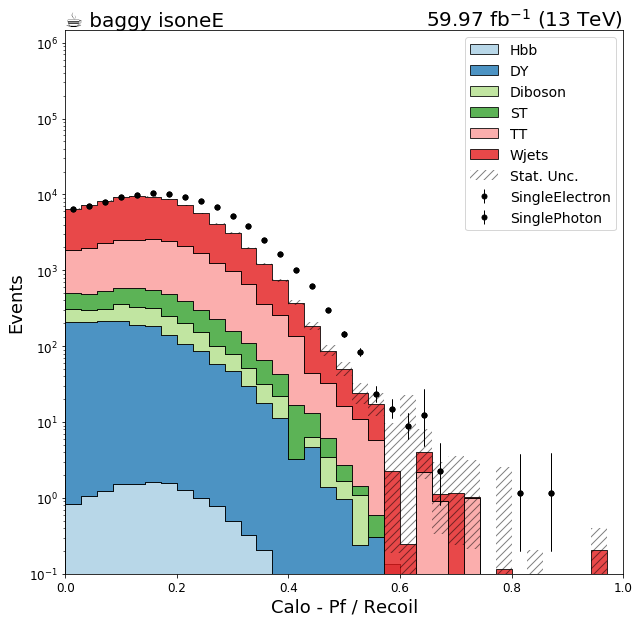

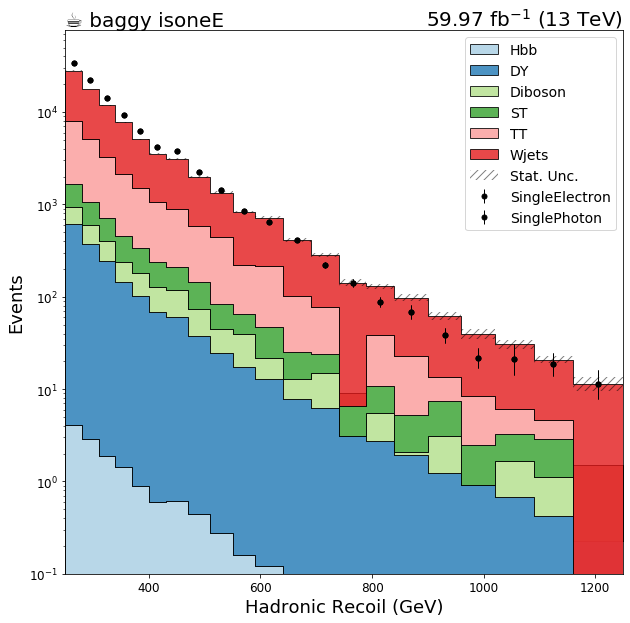

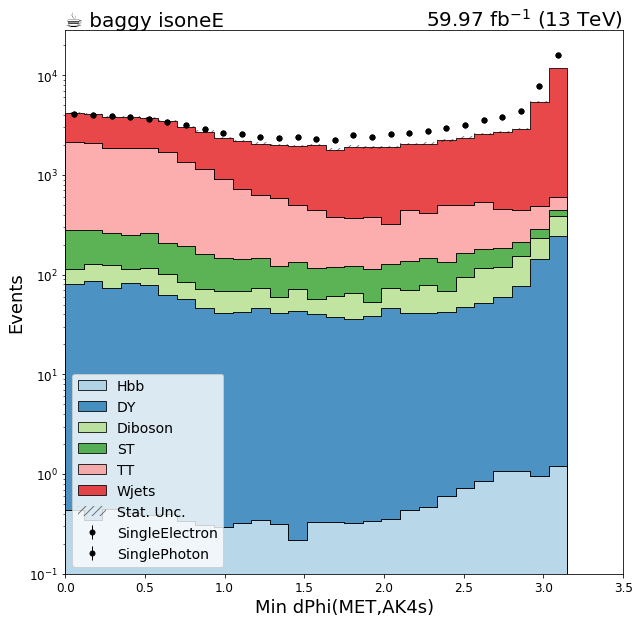

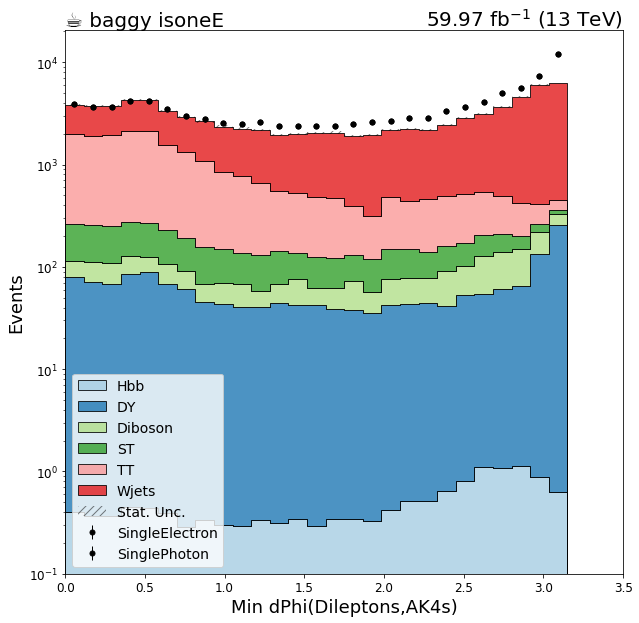

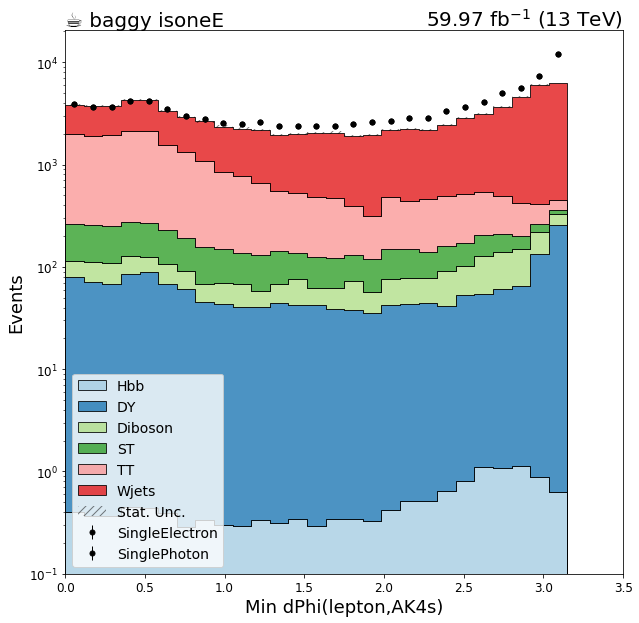

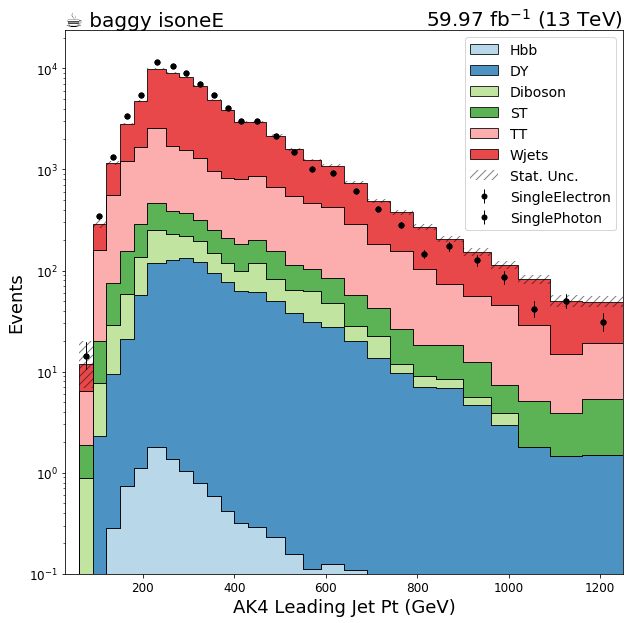

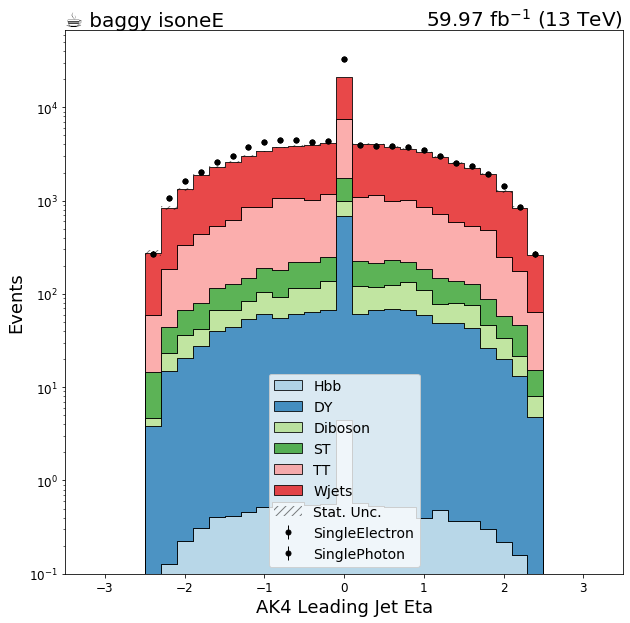

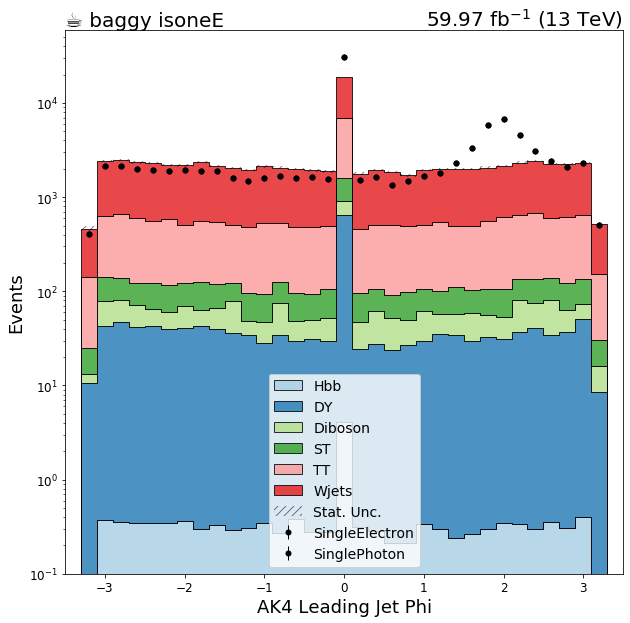

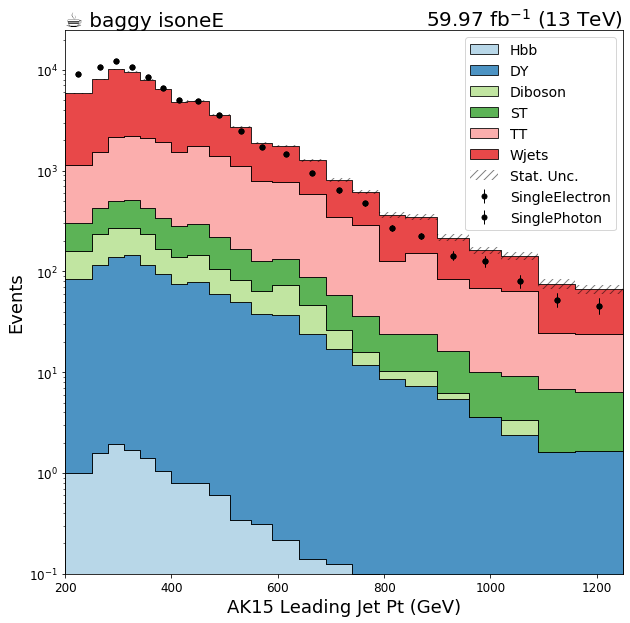

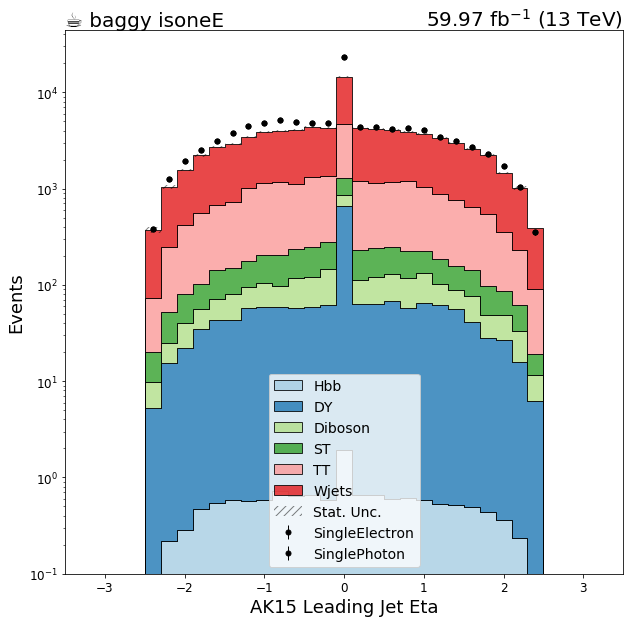

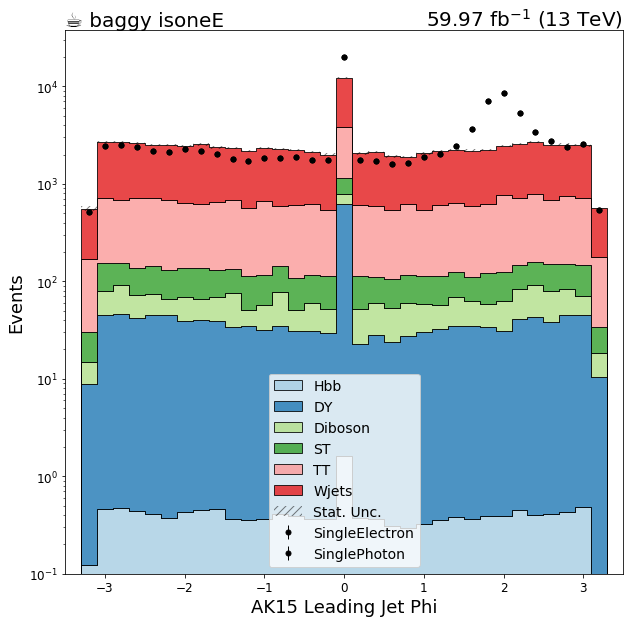

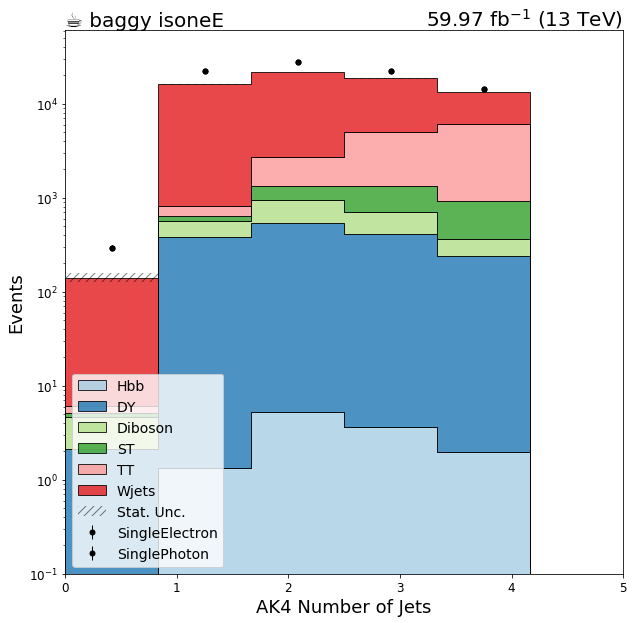

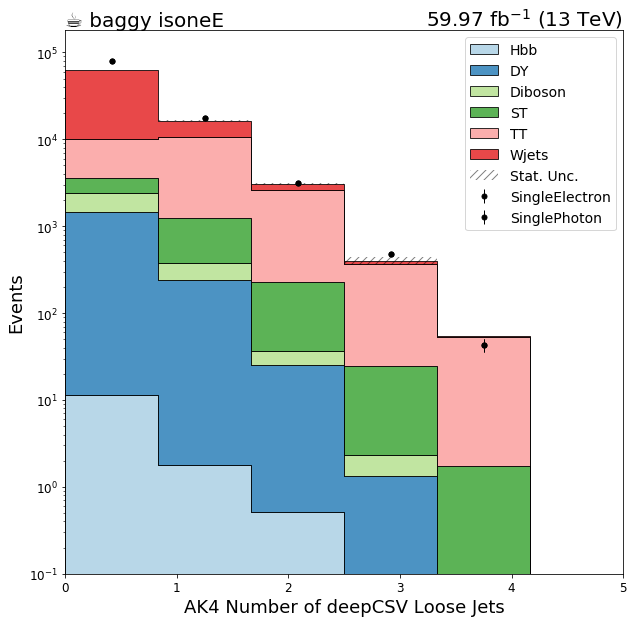

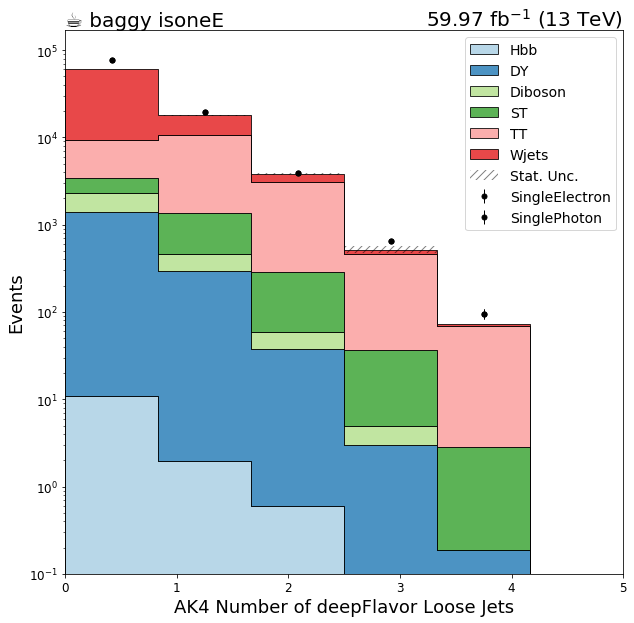

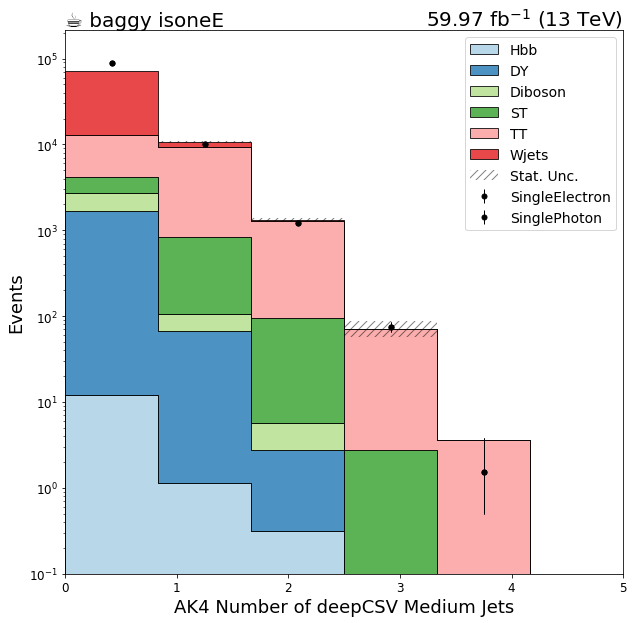

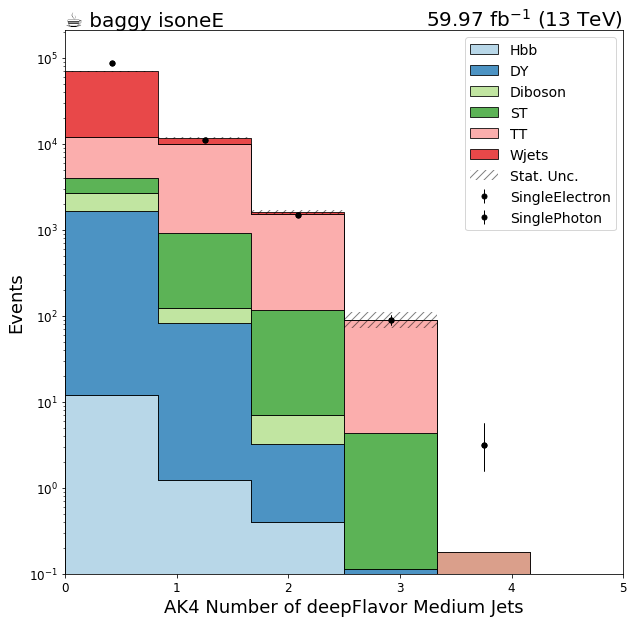

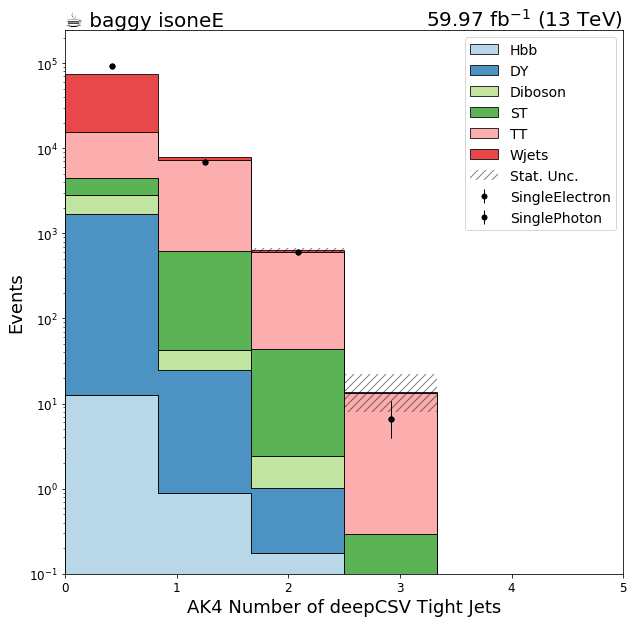

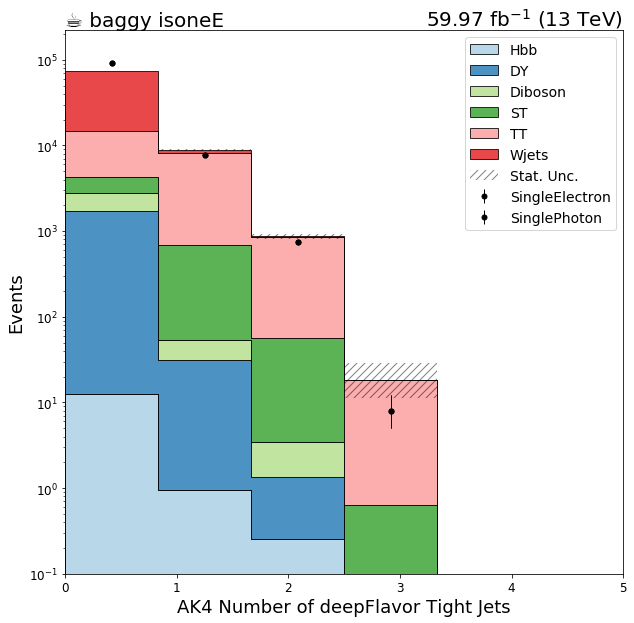

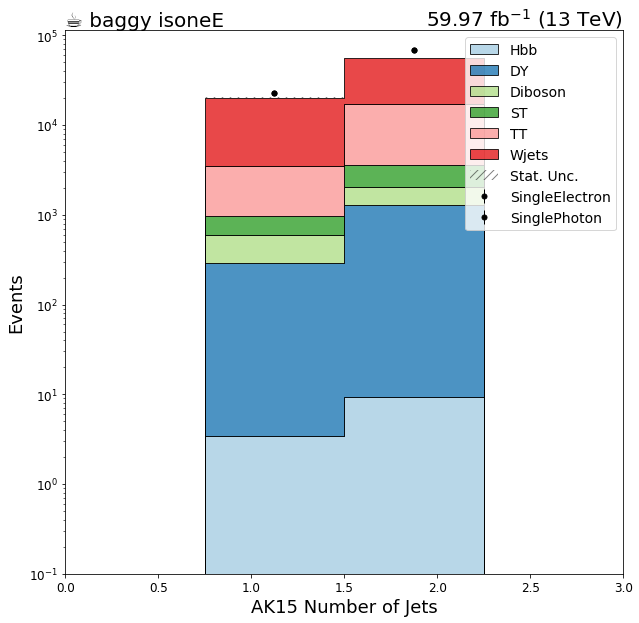

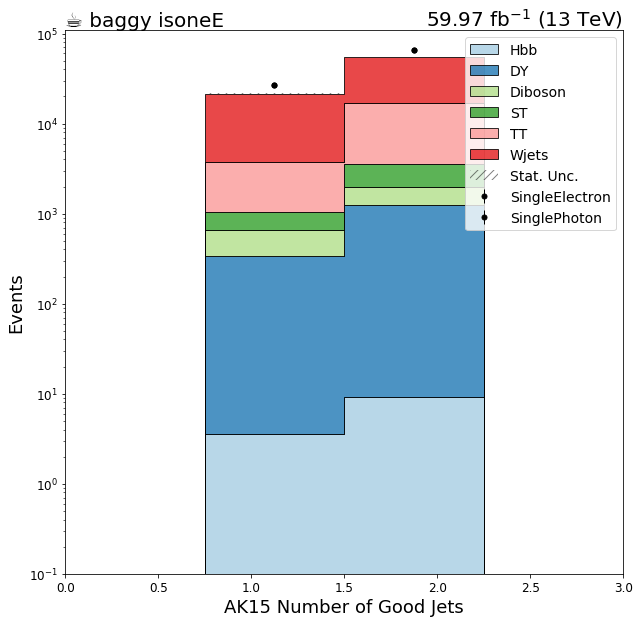

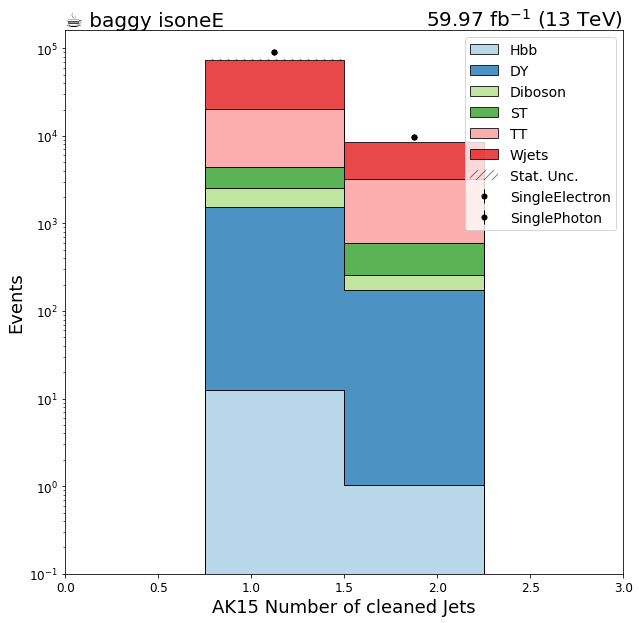

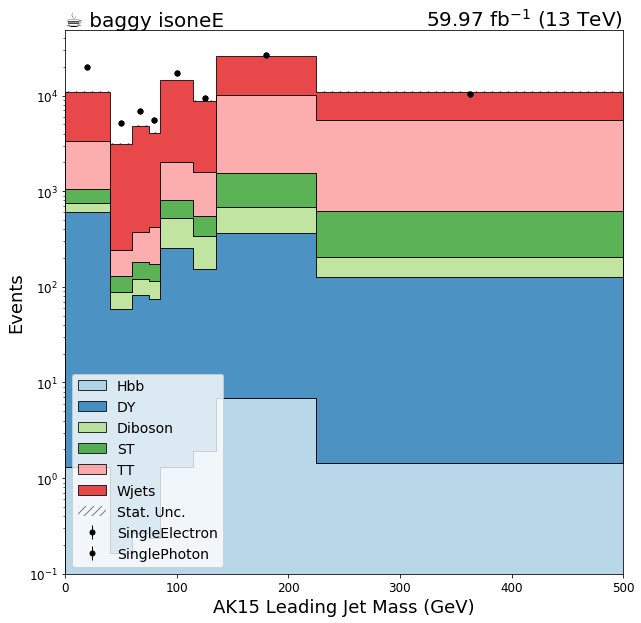

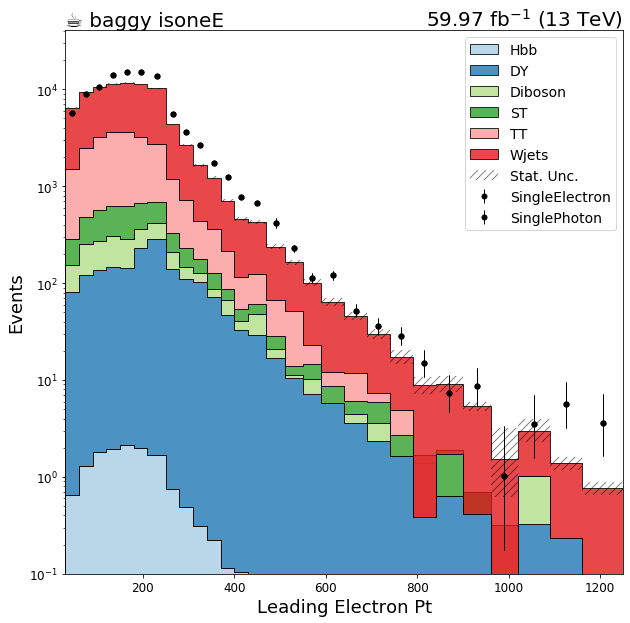

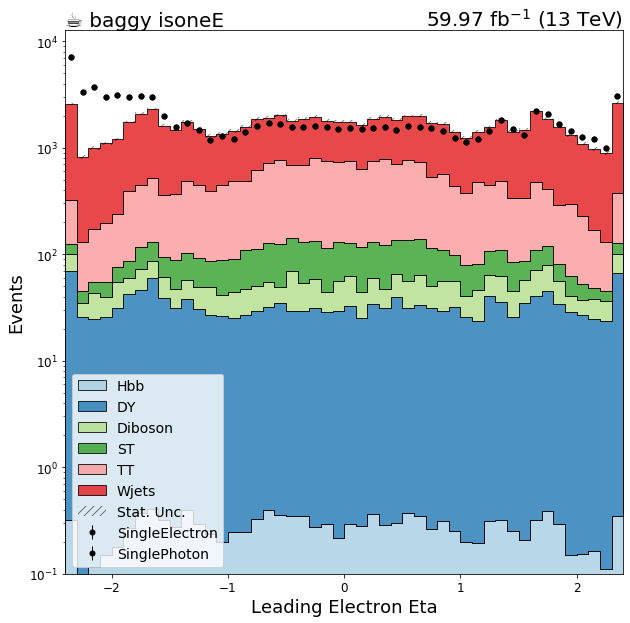

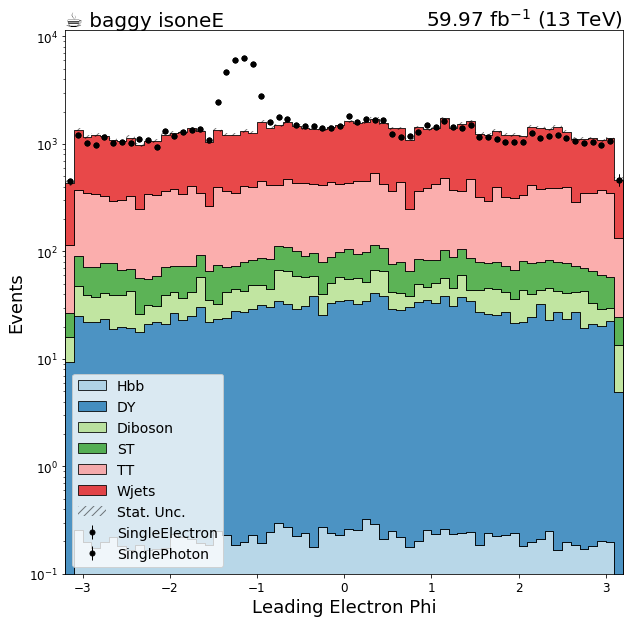

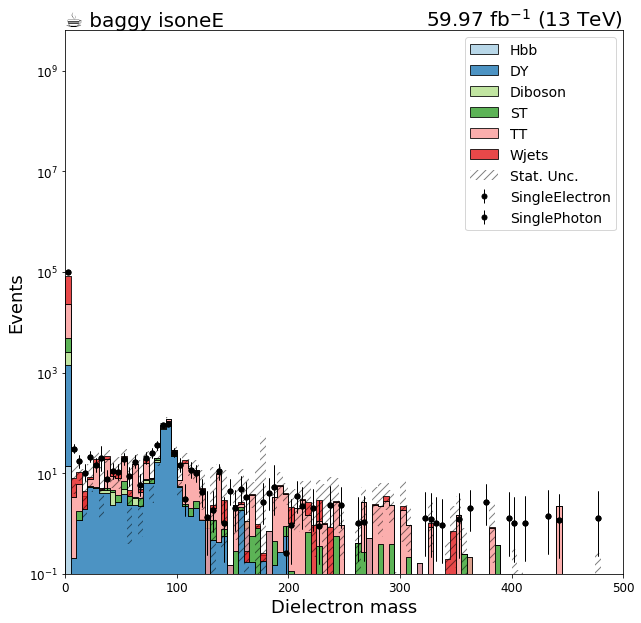

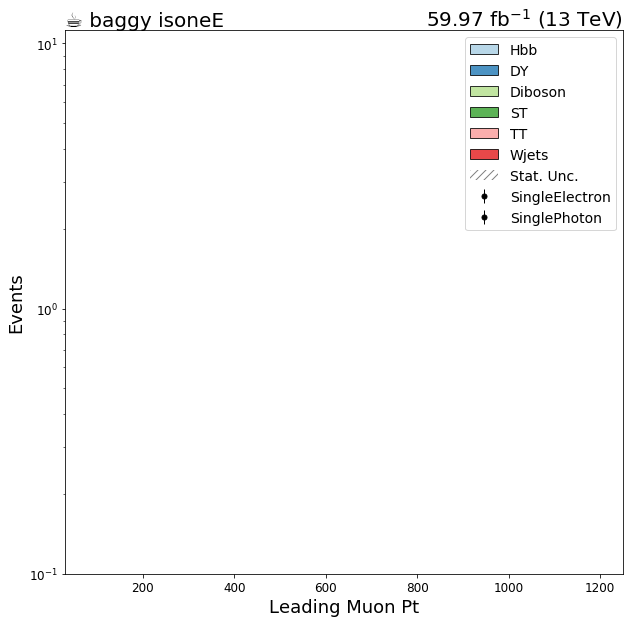

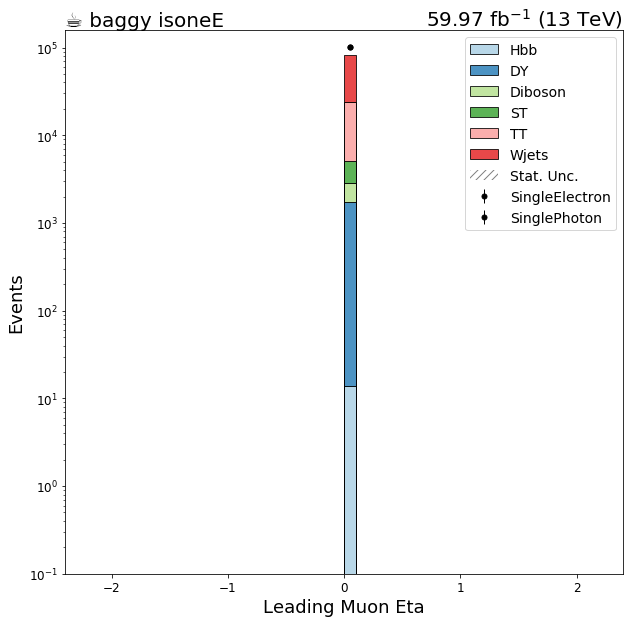

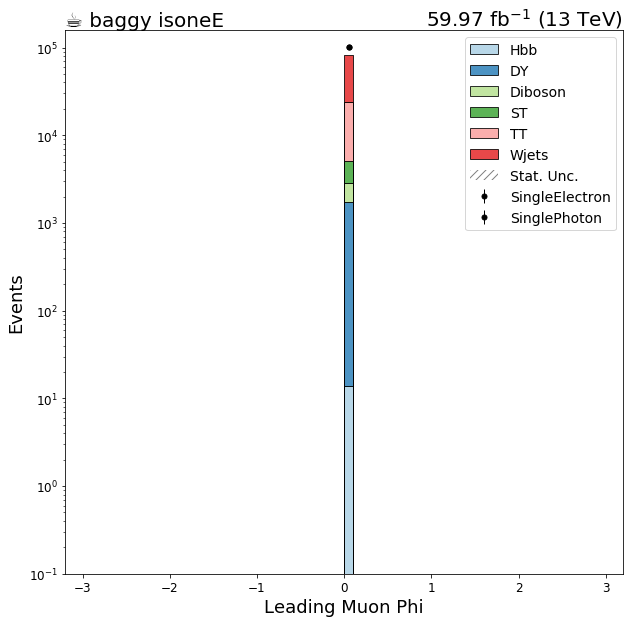

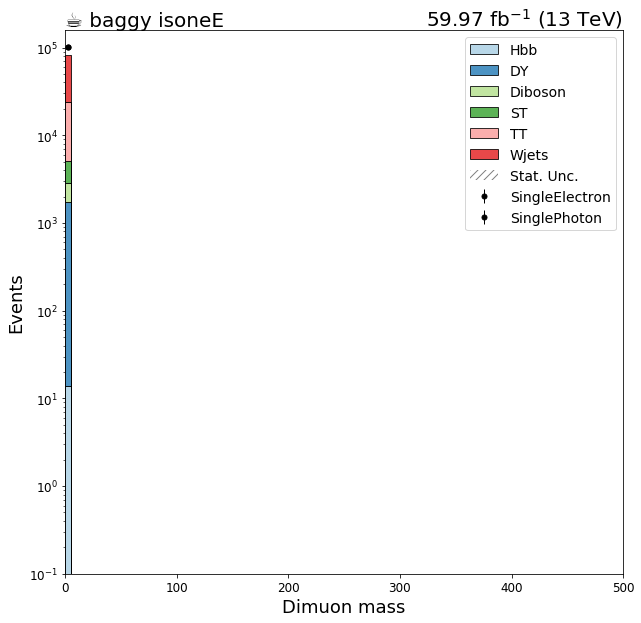

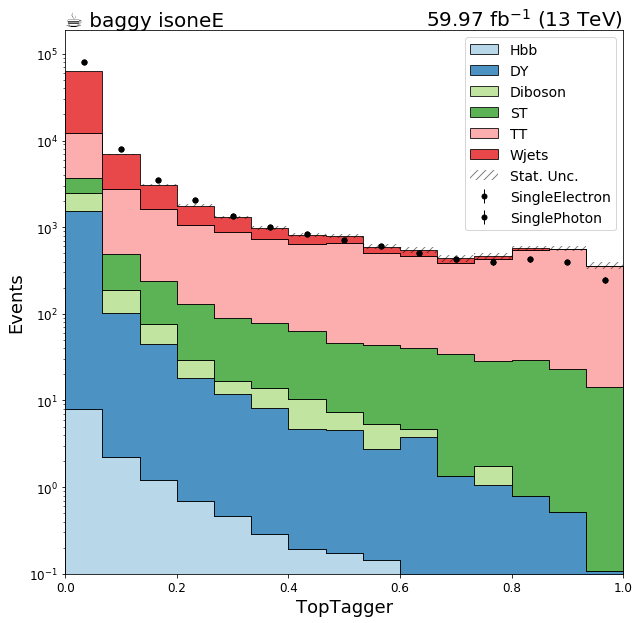

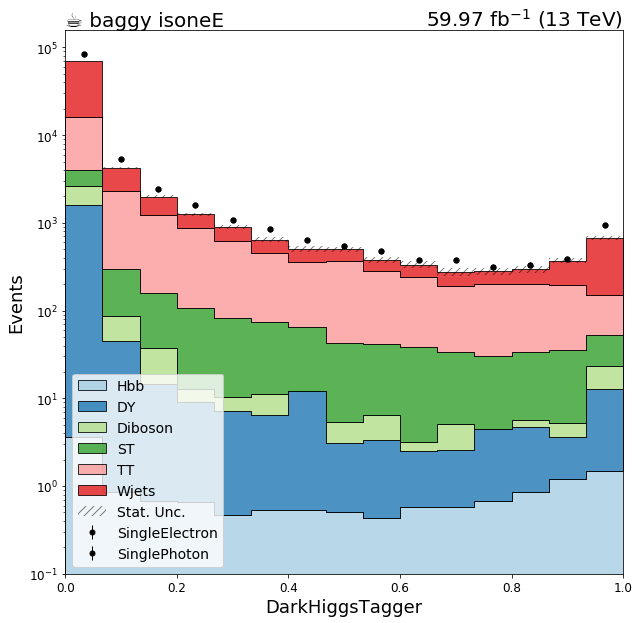

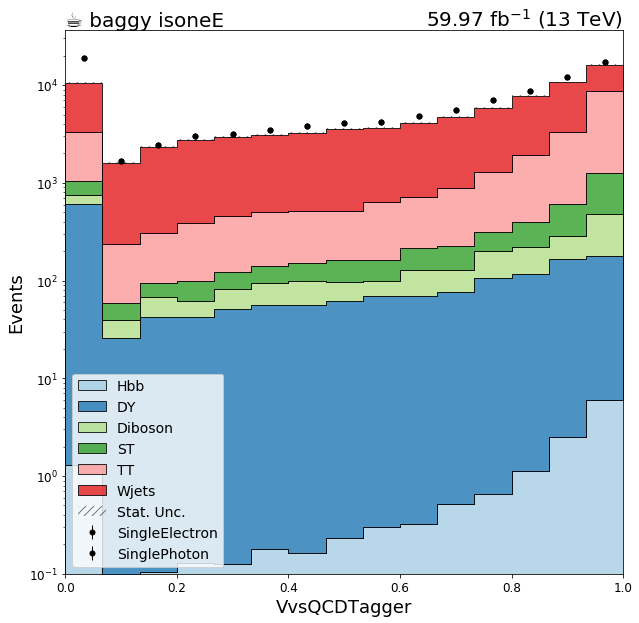

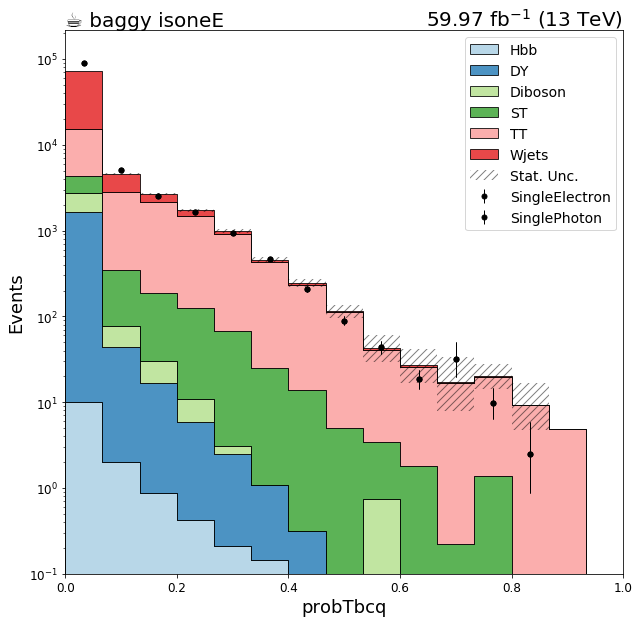

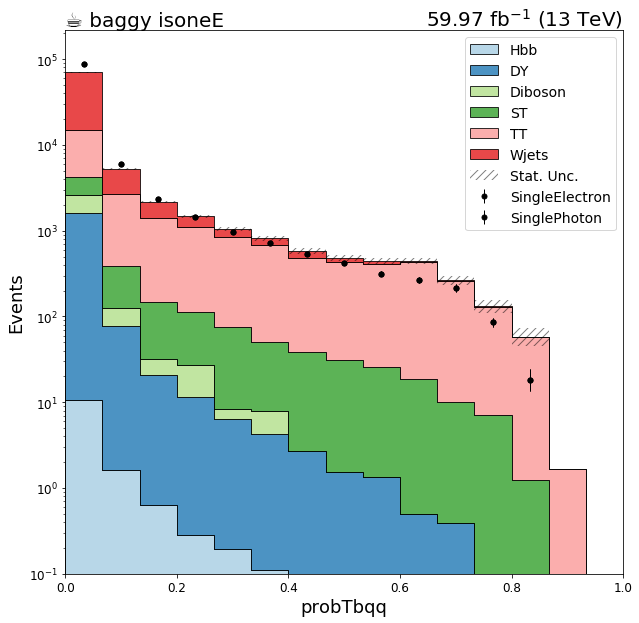

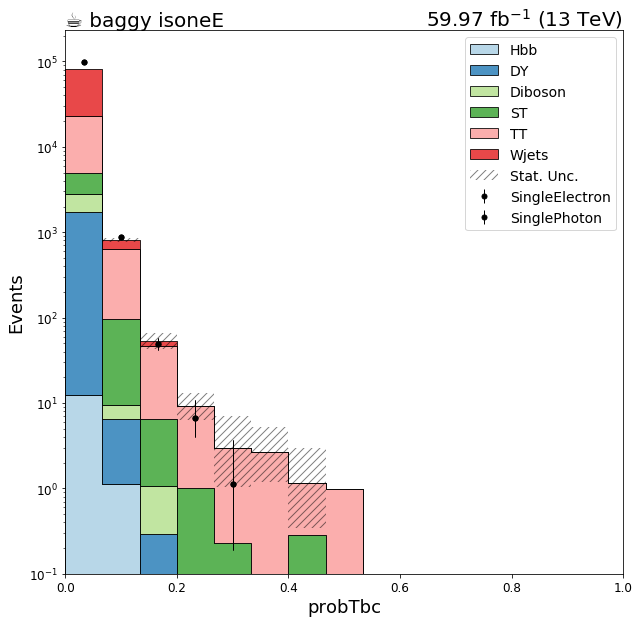

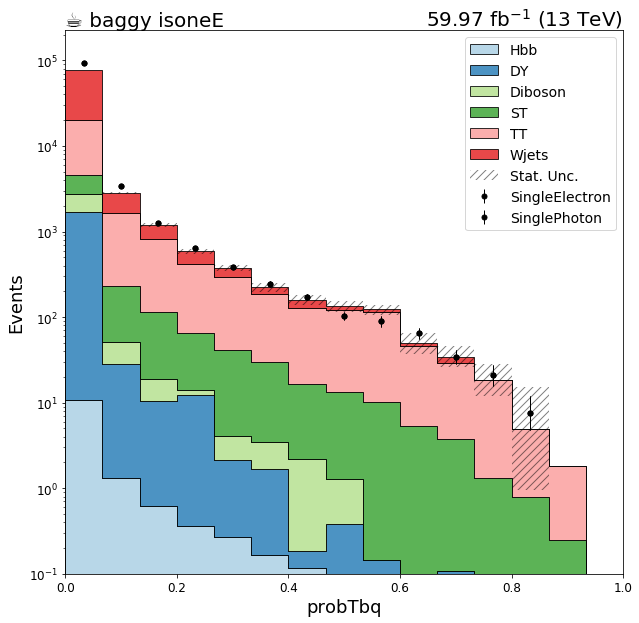

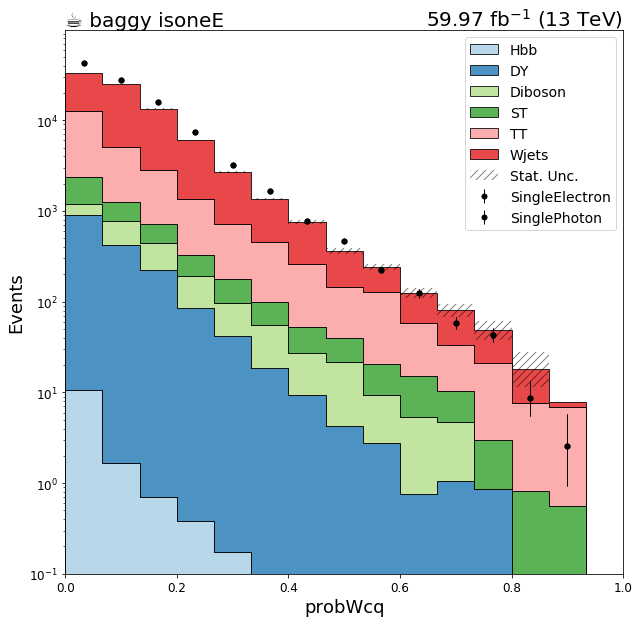

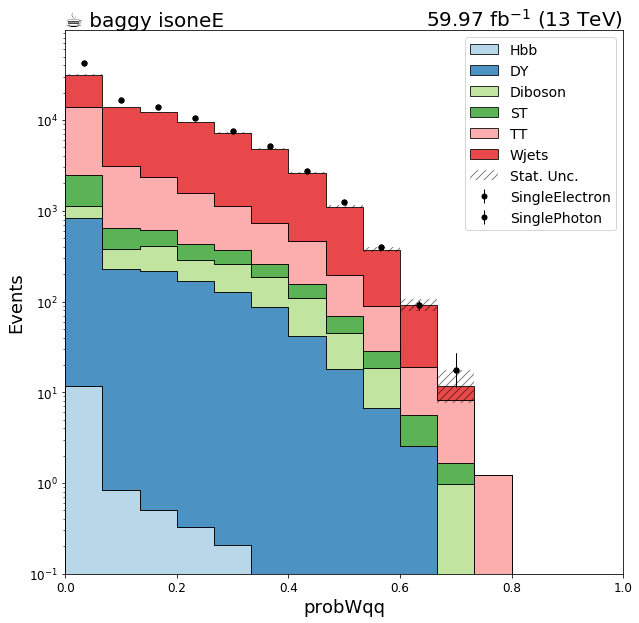

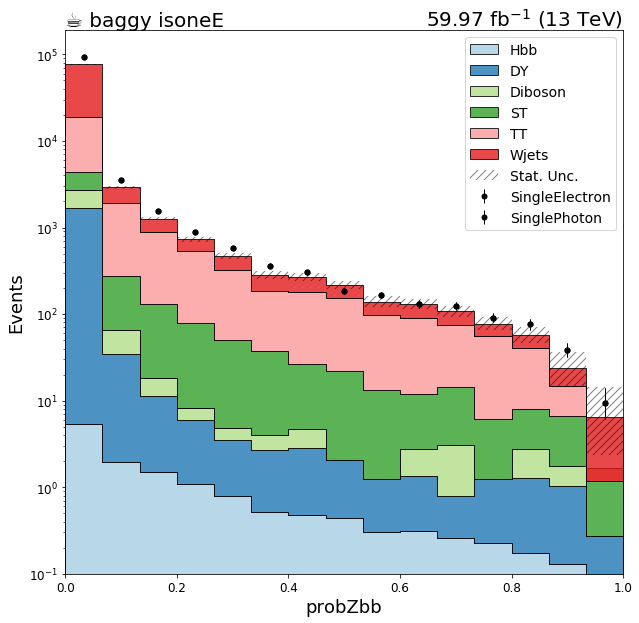

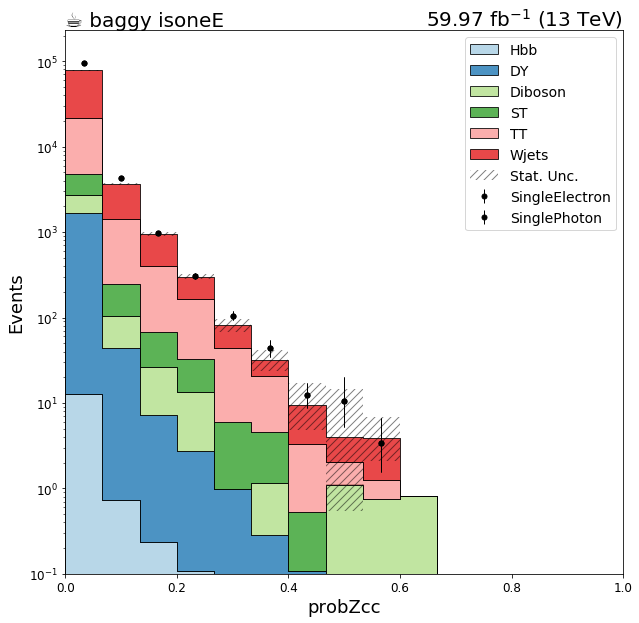

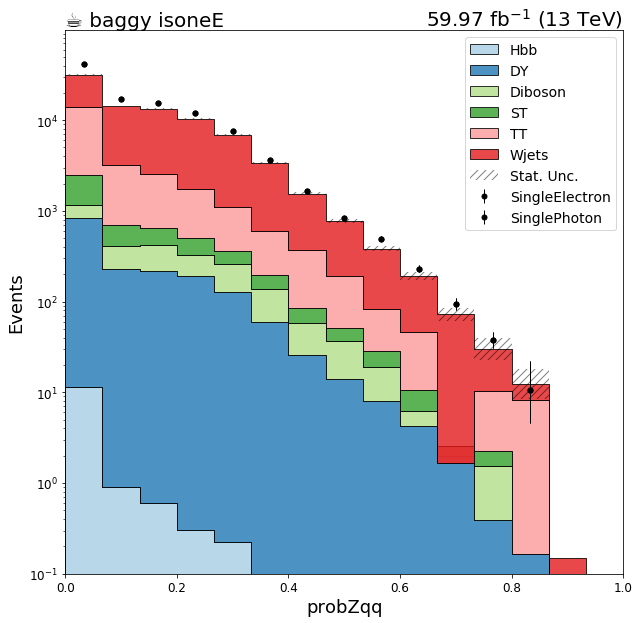

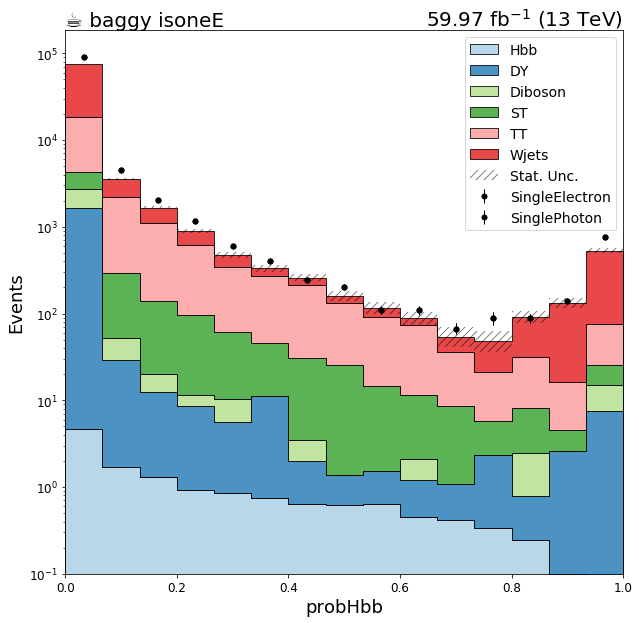

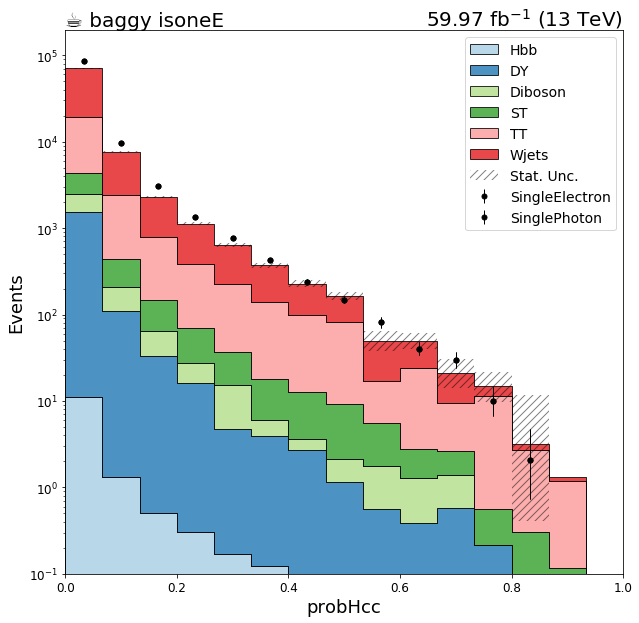

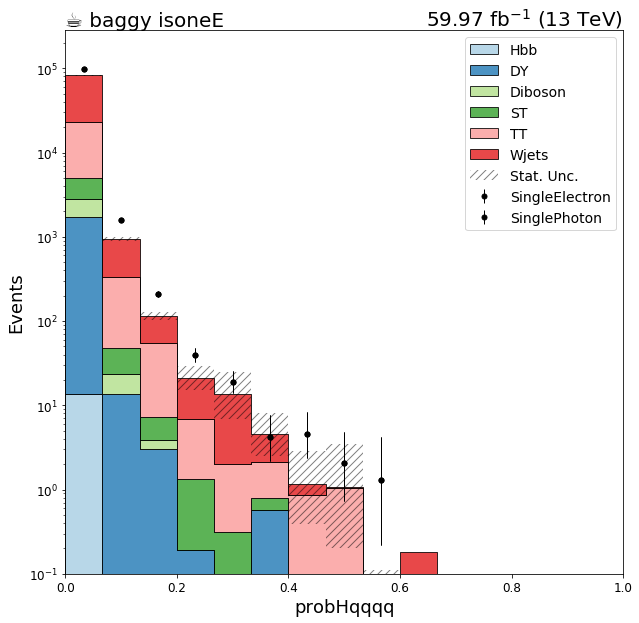

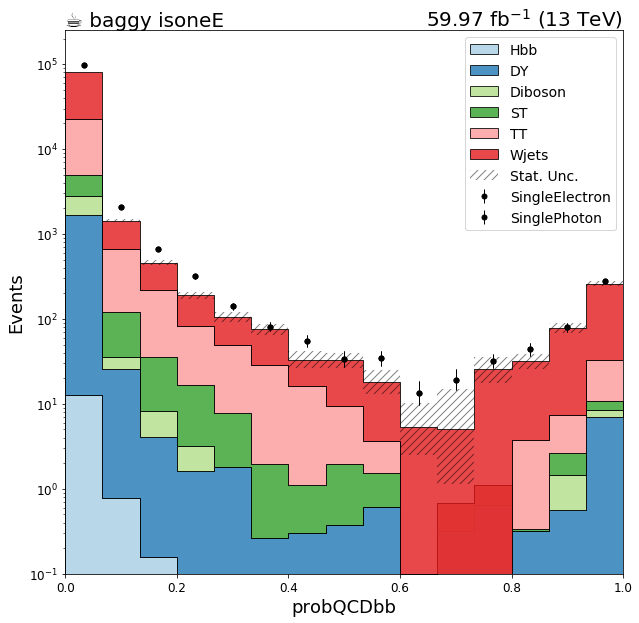

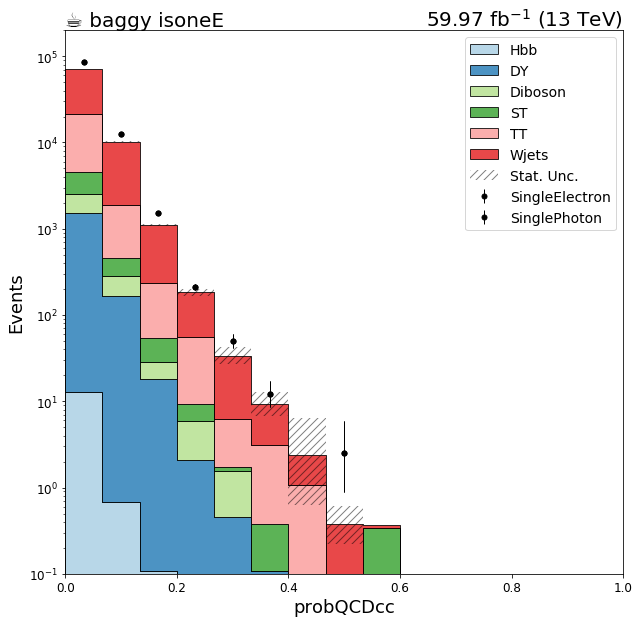

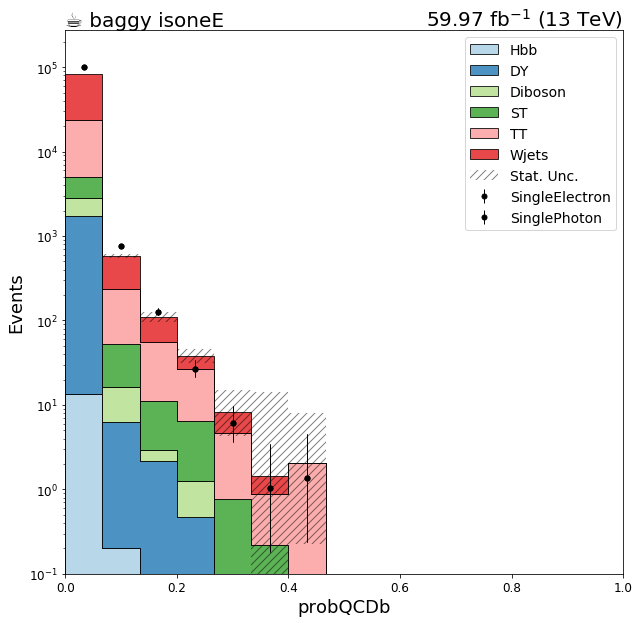

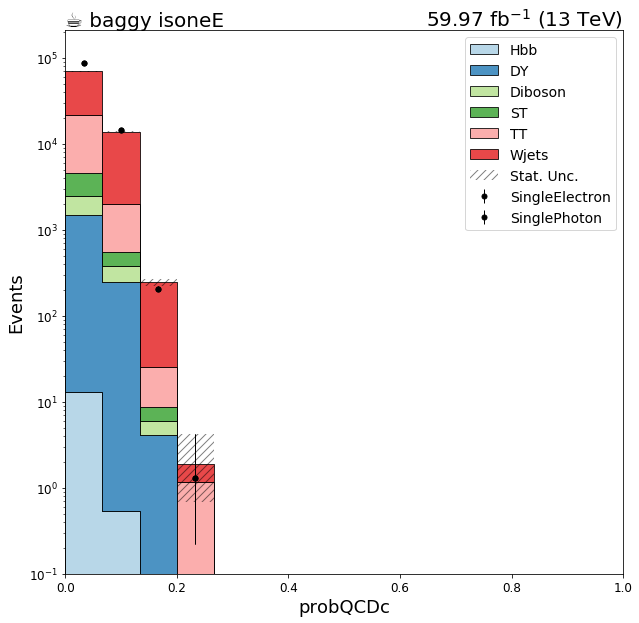

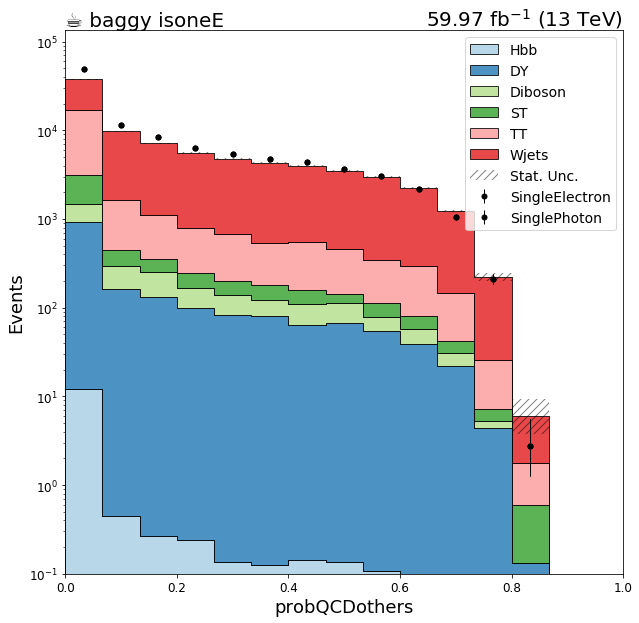

In [12]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
#colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw' or key=='mindR' or key=='ledR' or key=='diledR' or key=='recoilVSmindphi': continue
    
    jet_selection = 'baggy'
    region = 'isoneE'
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('jet_selection',jet_selection).project('region',region),            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region',region),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            #line_opts={'linestyle':'none', 'label':'_', 'alpha': 0.},
            #line_opts={'linestyle':'-','color':'k','label':'_'},
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ %s %s" % (jet_selection, region), fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'_'+jet_selection+'_'+region+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


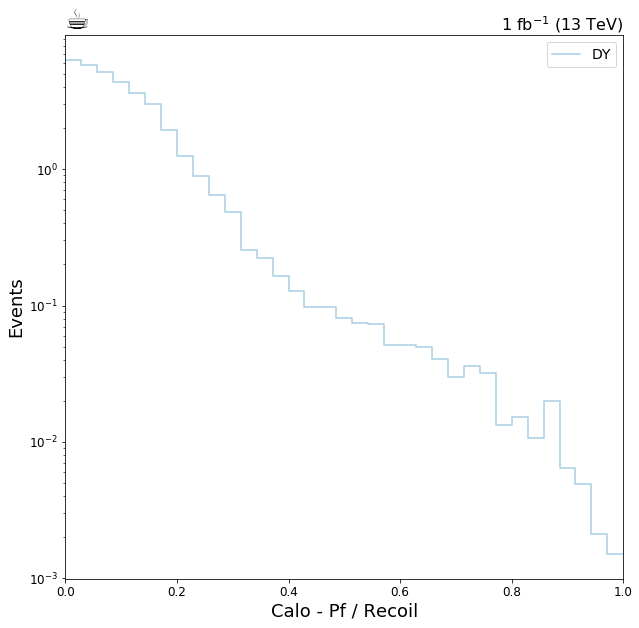

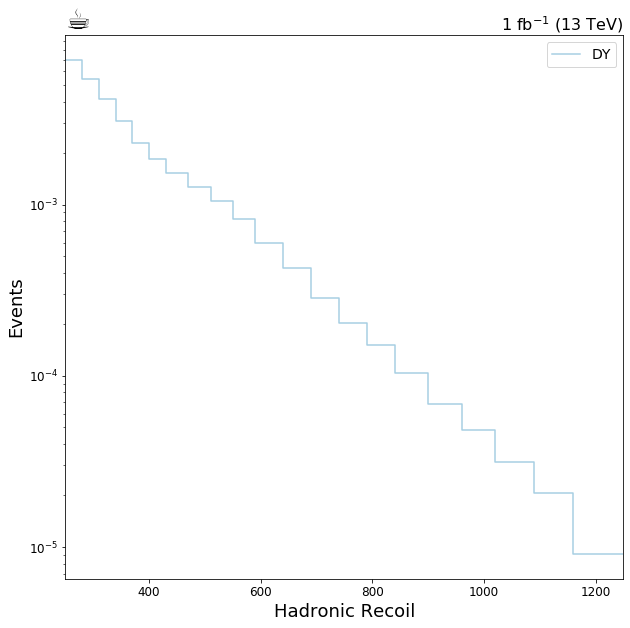

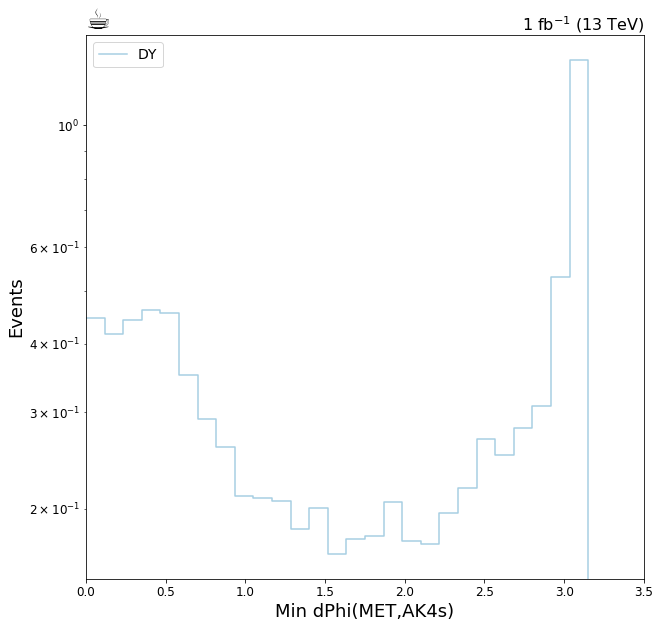

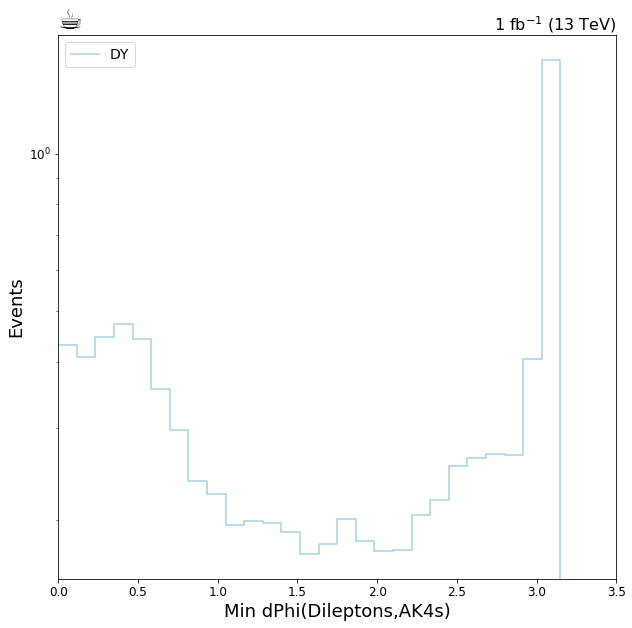

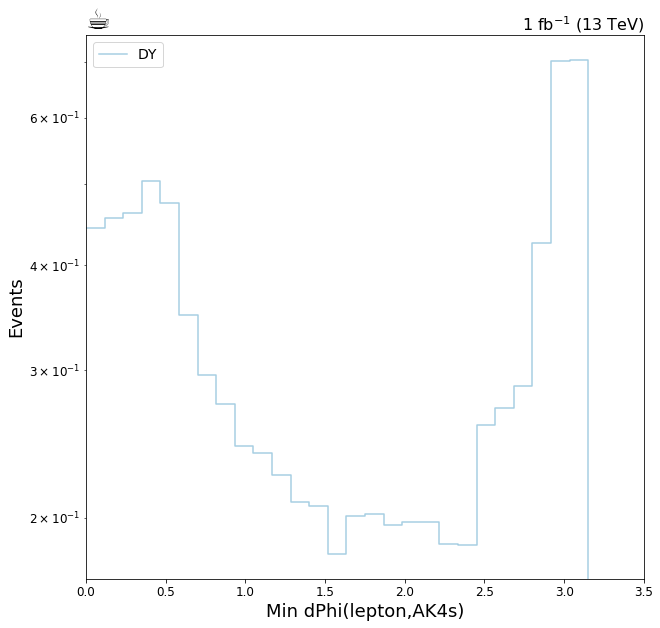

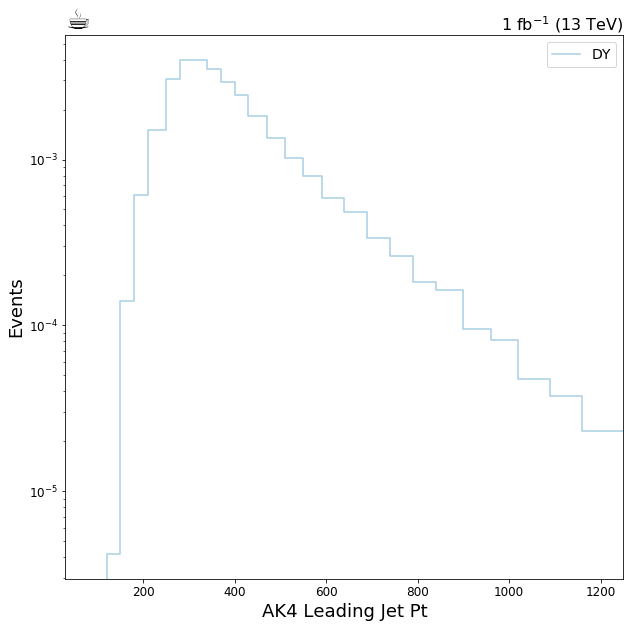

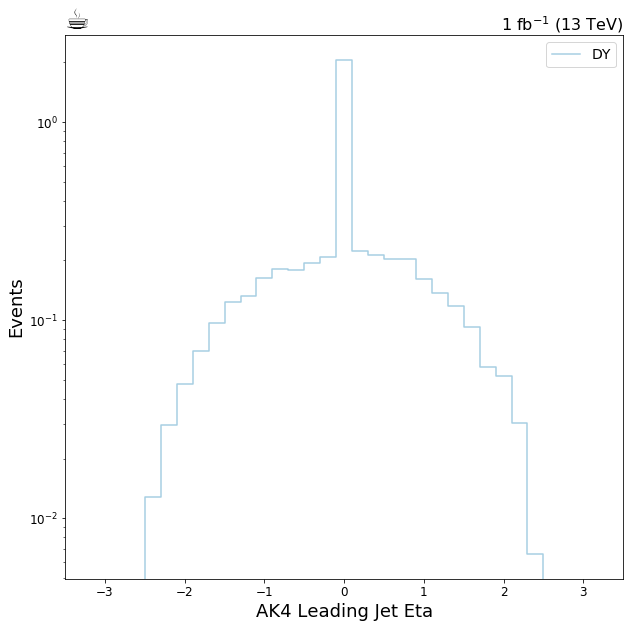

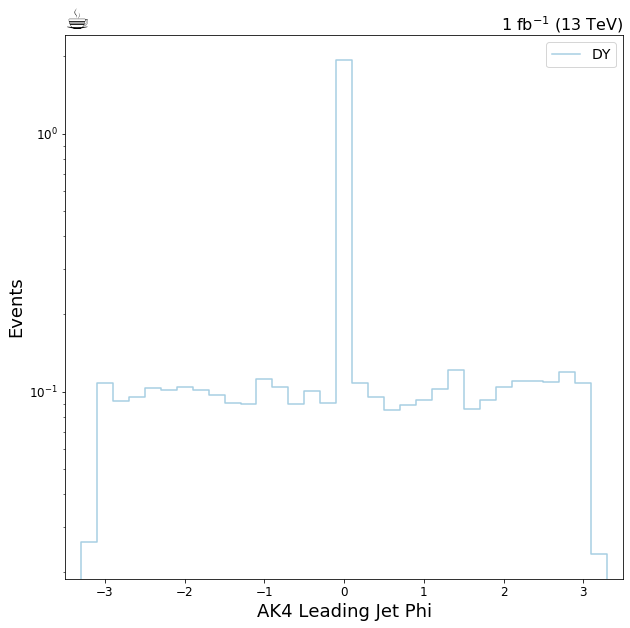

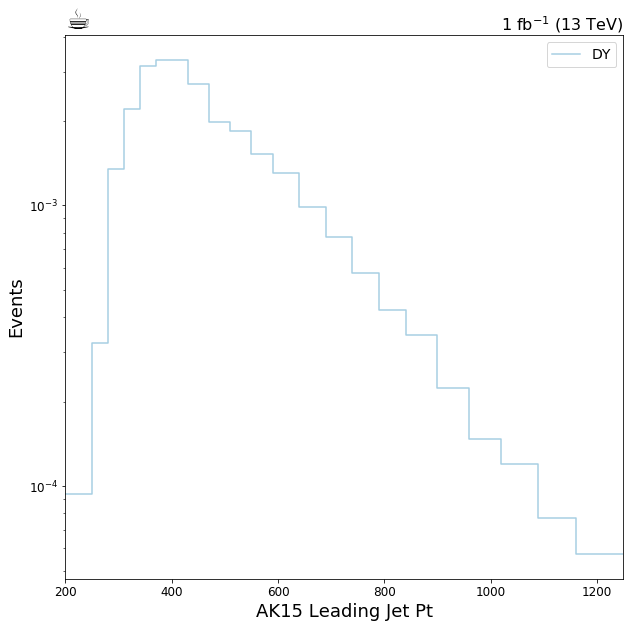

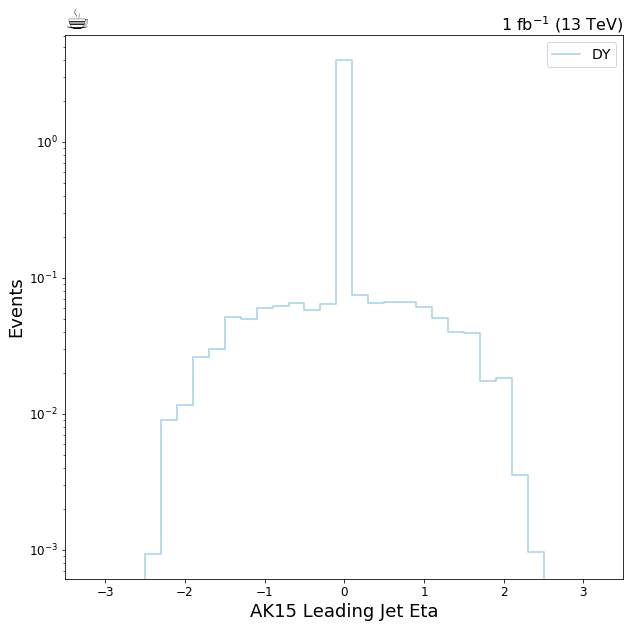

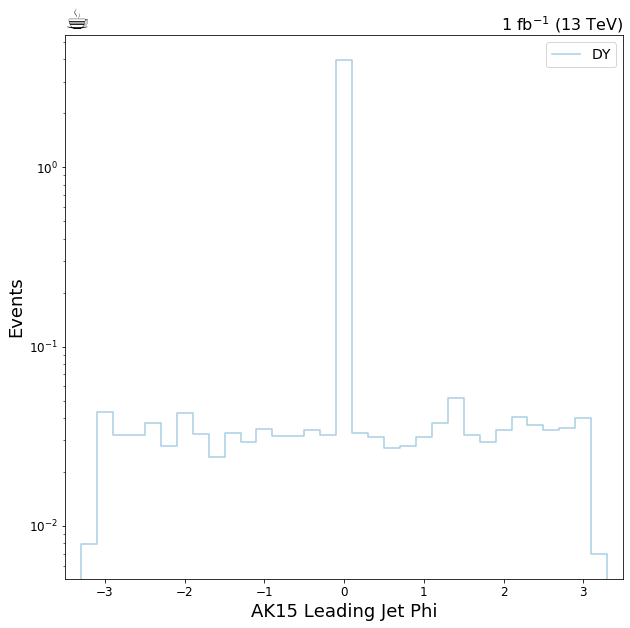

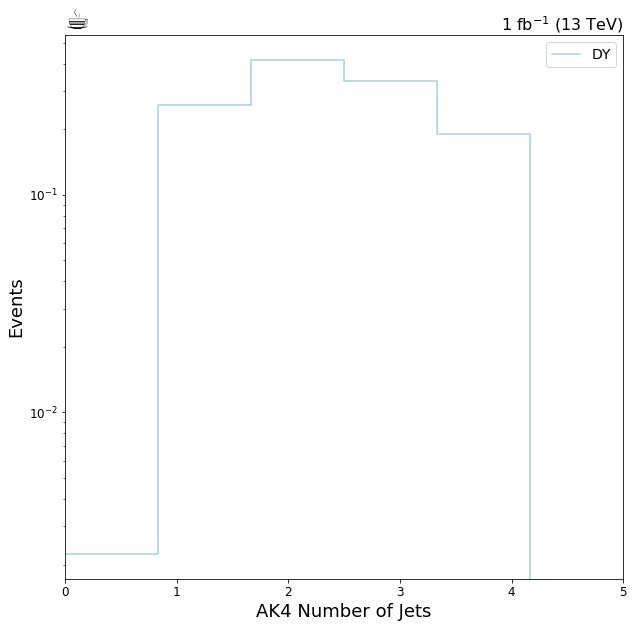

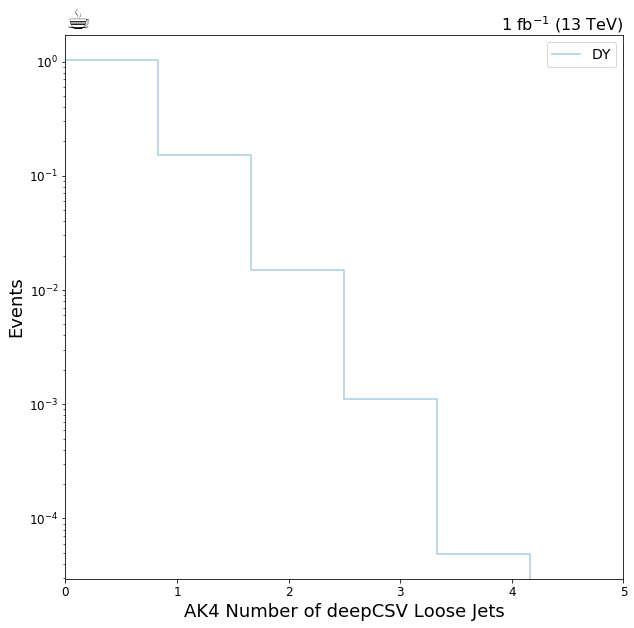

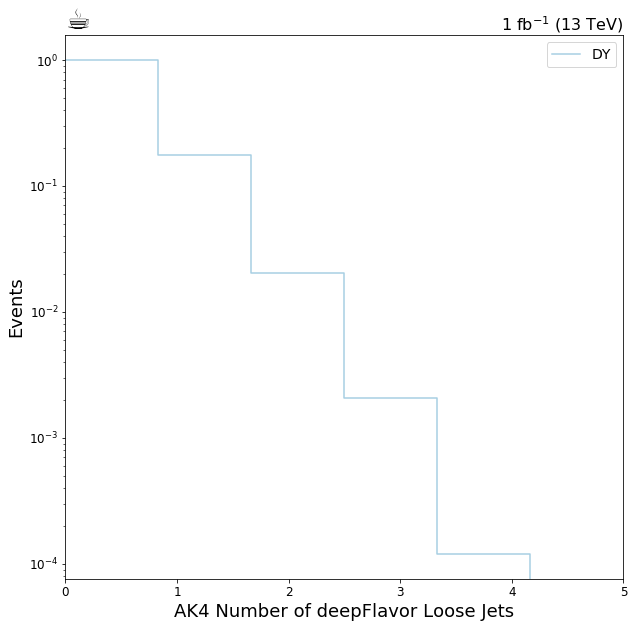

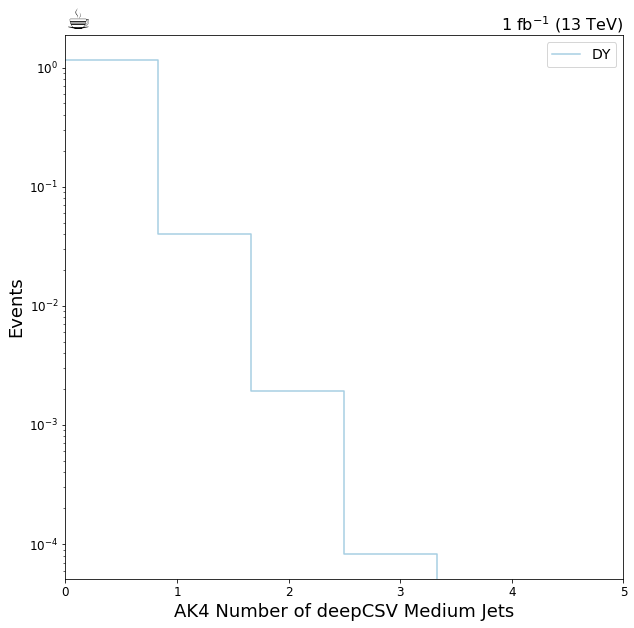

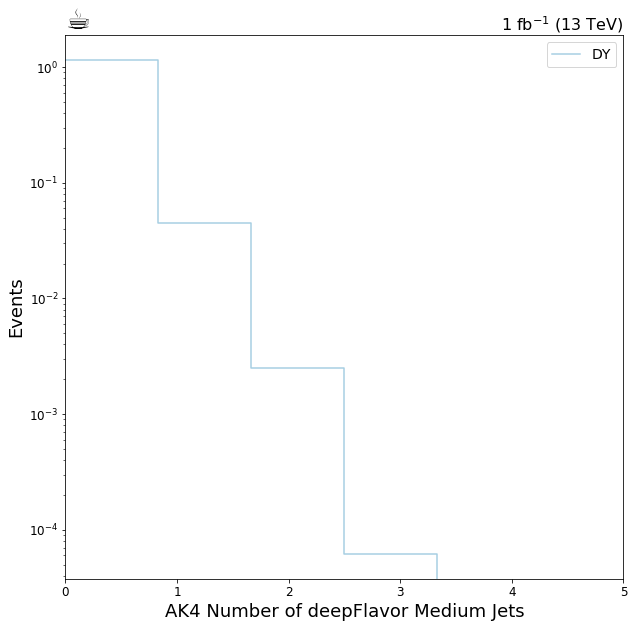

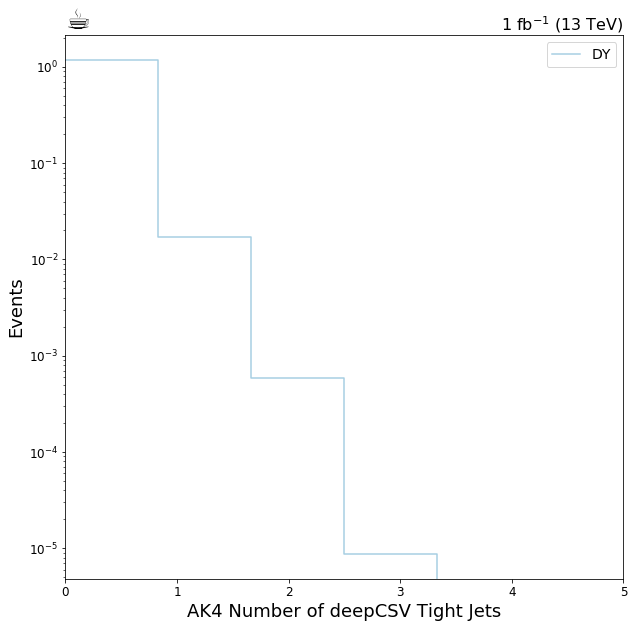

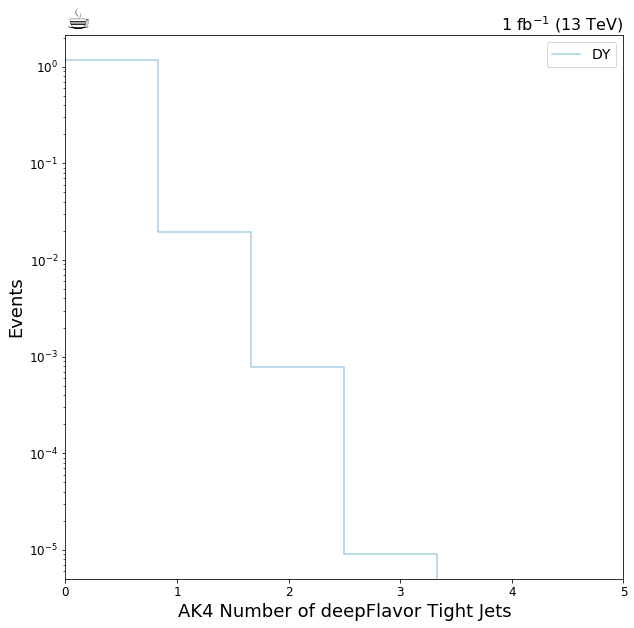

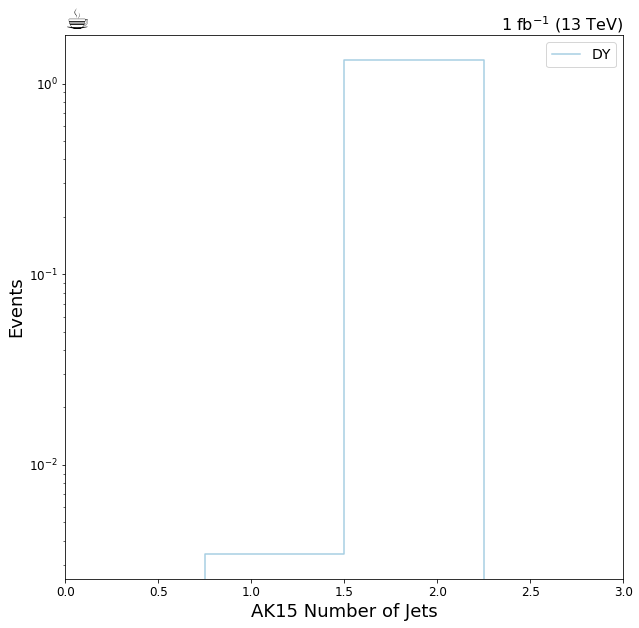

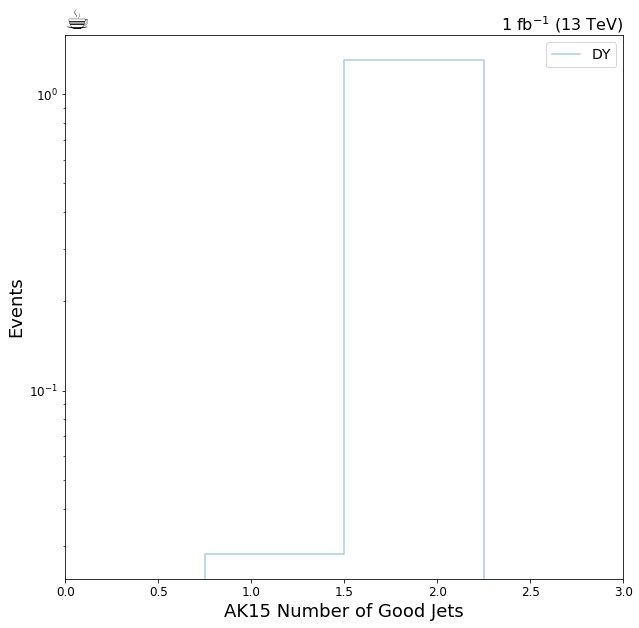

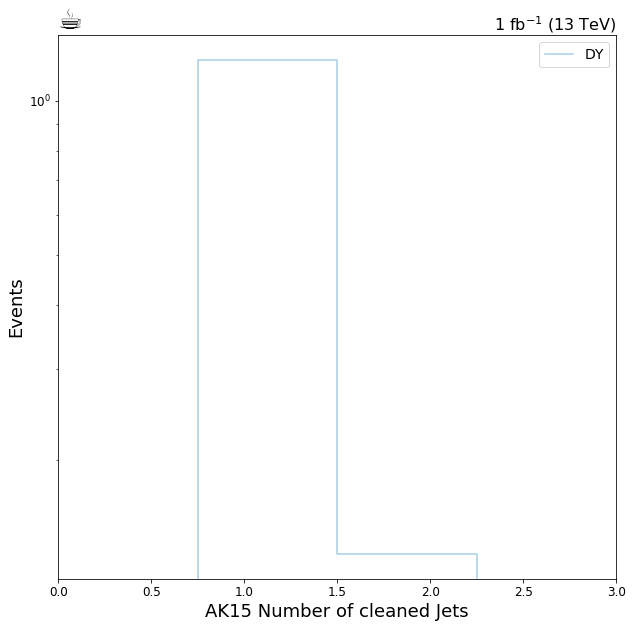

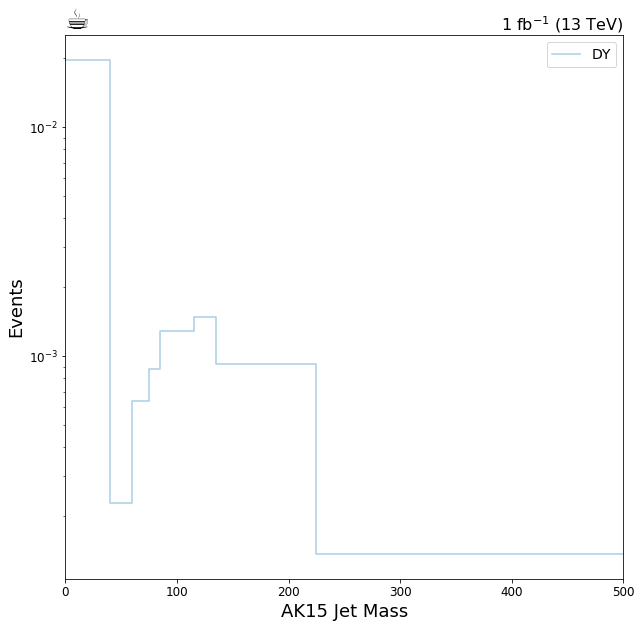

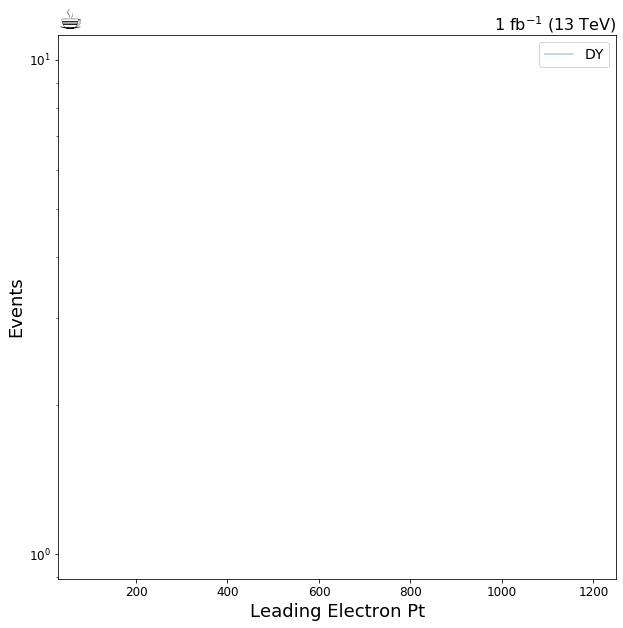

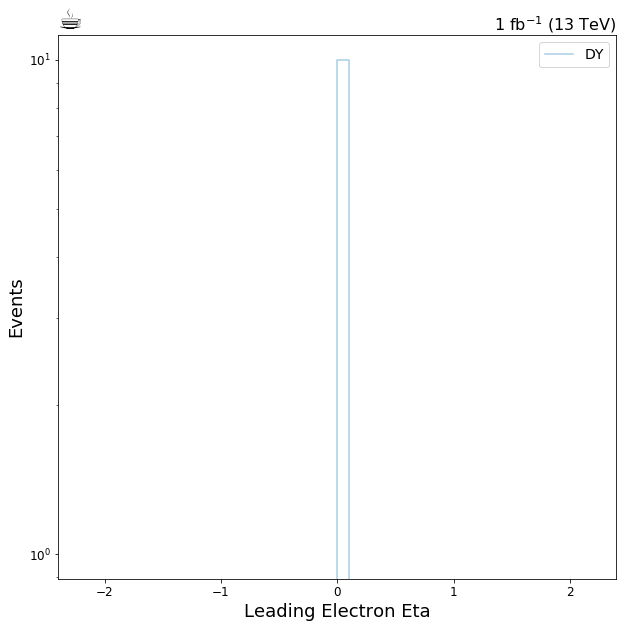

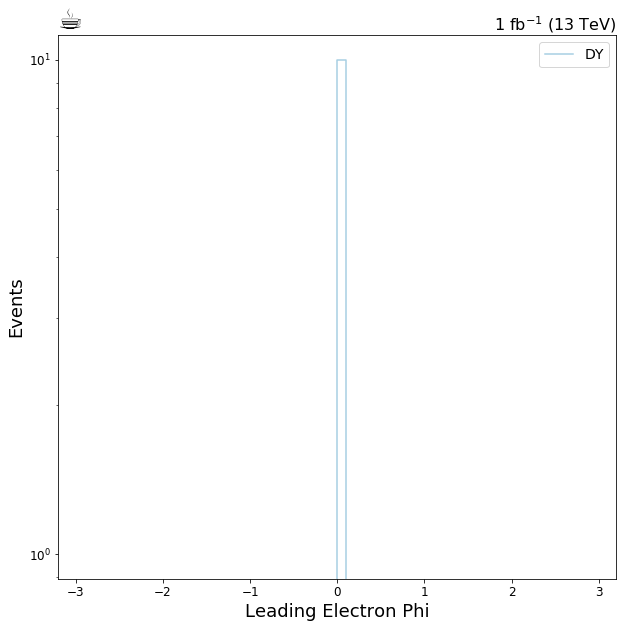

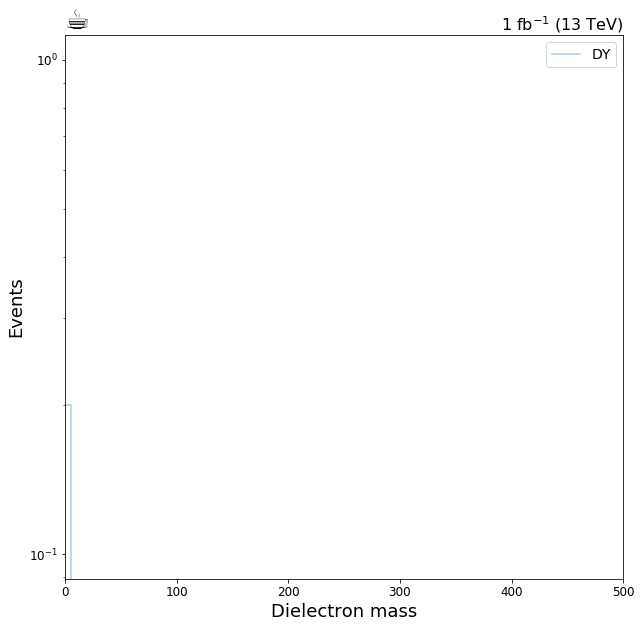

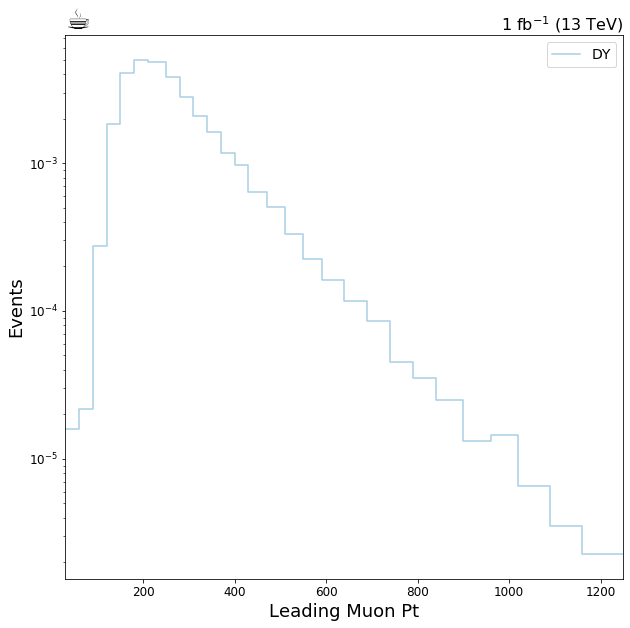

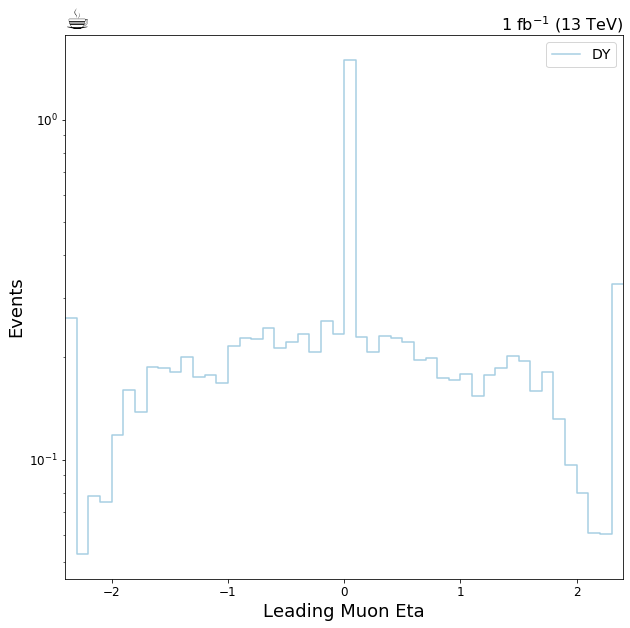

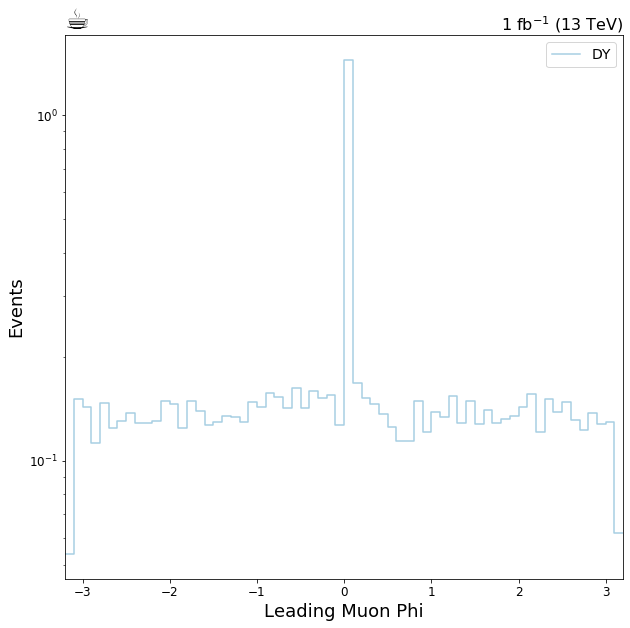

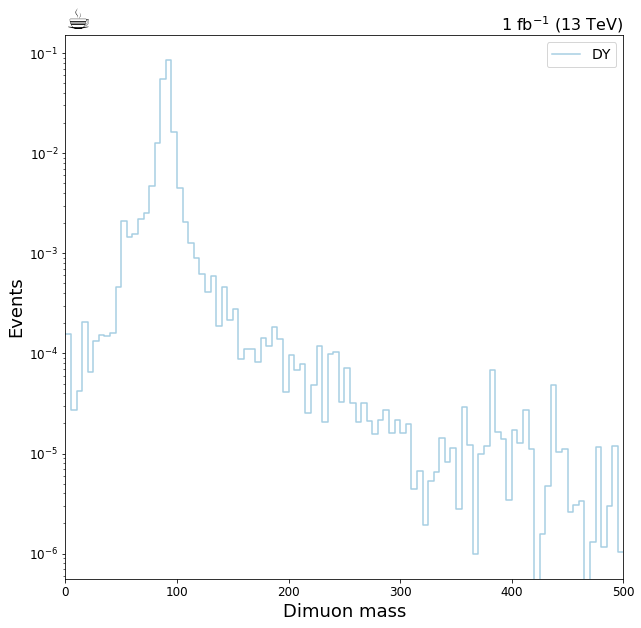

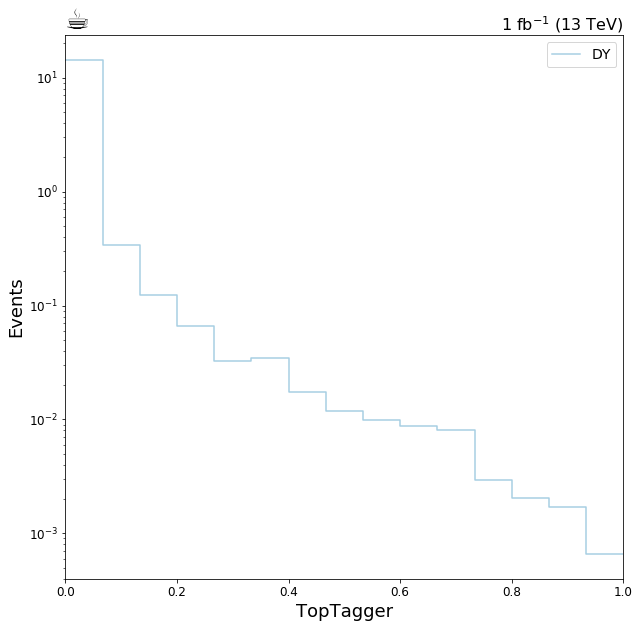

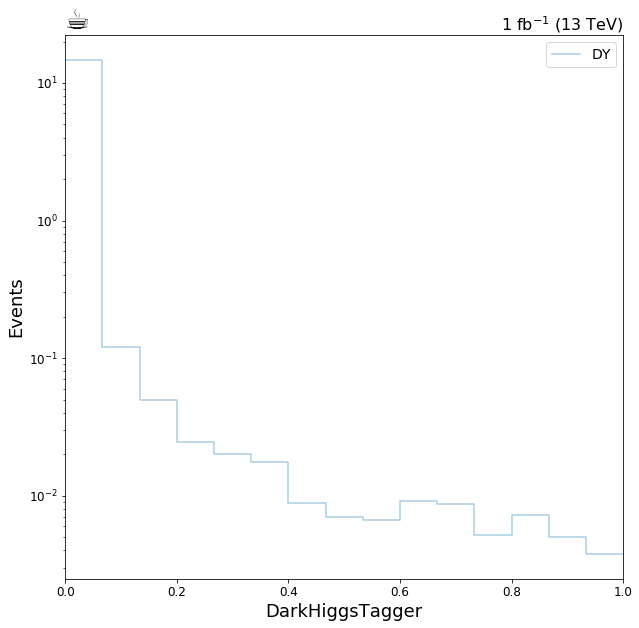

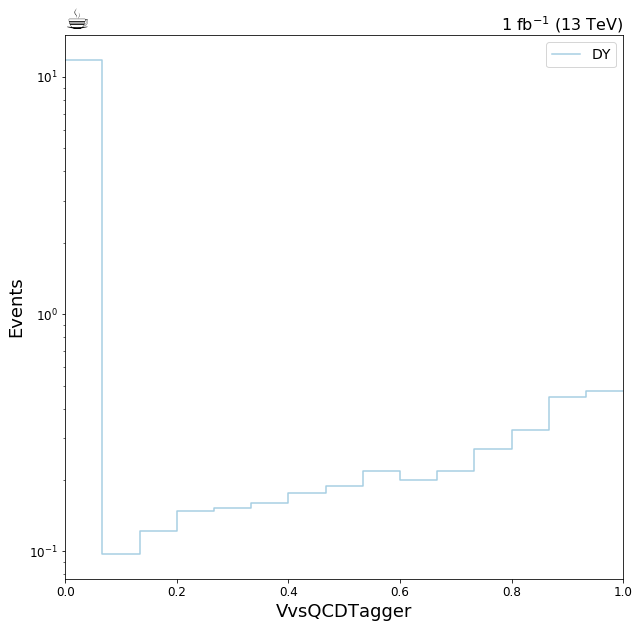

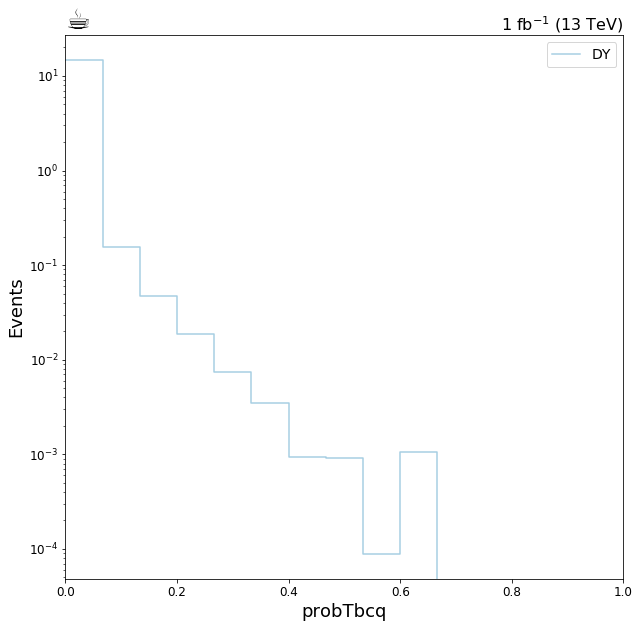

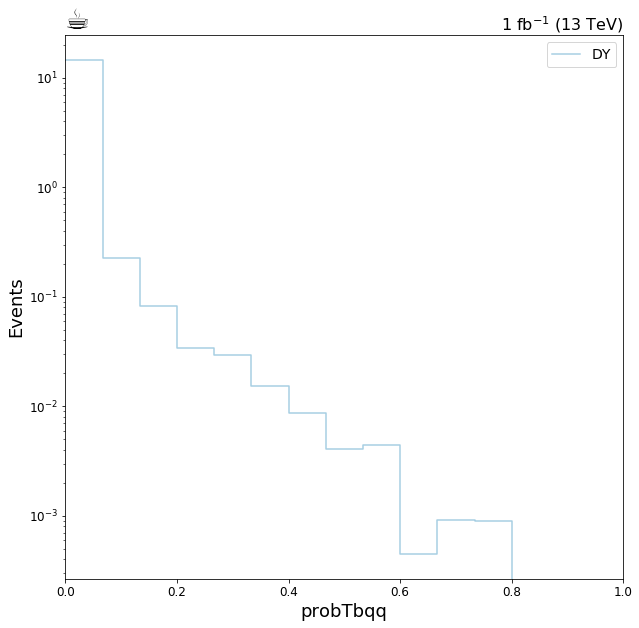

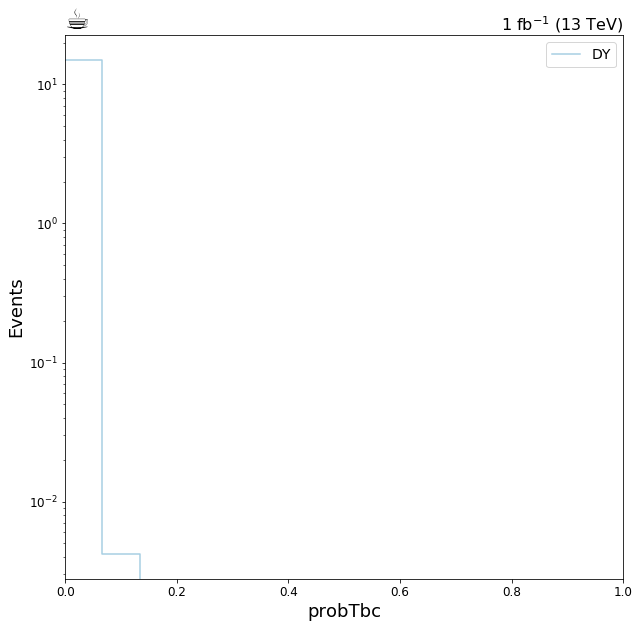

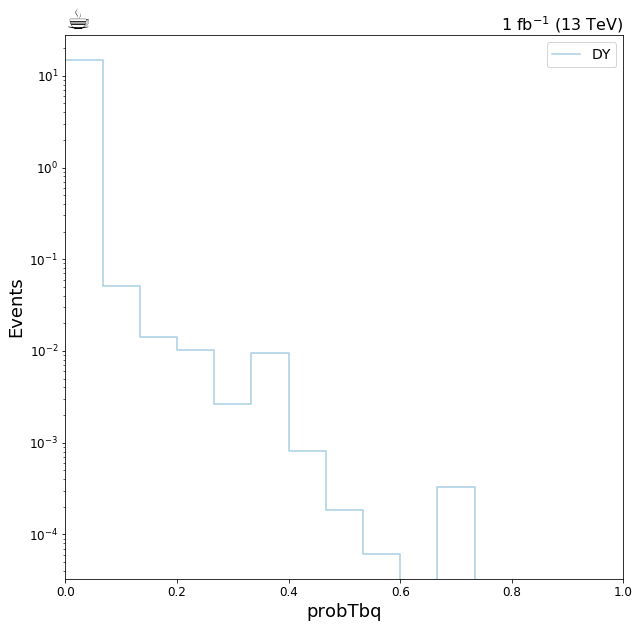

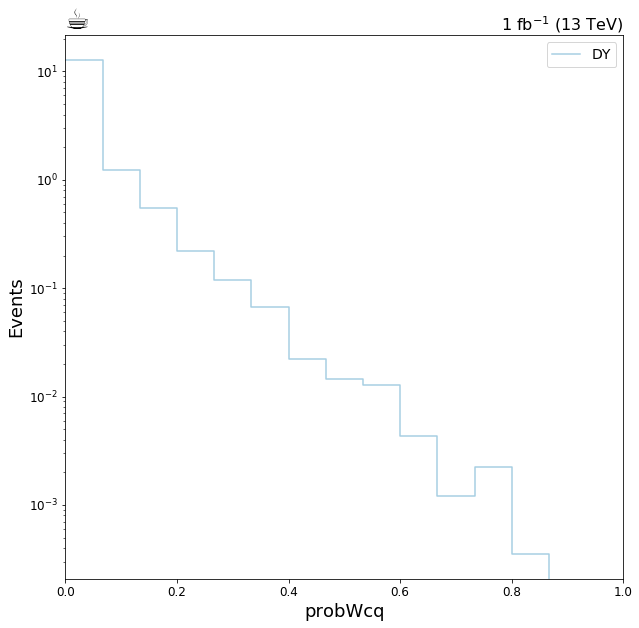

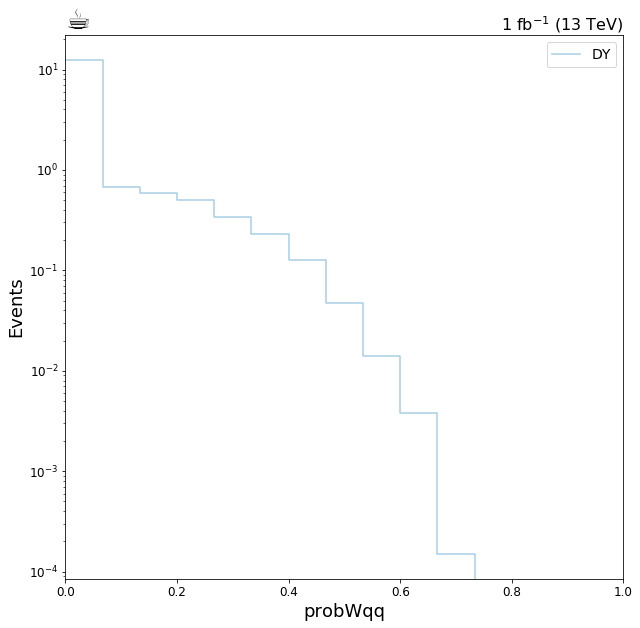

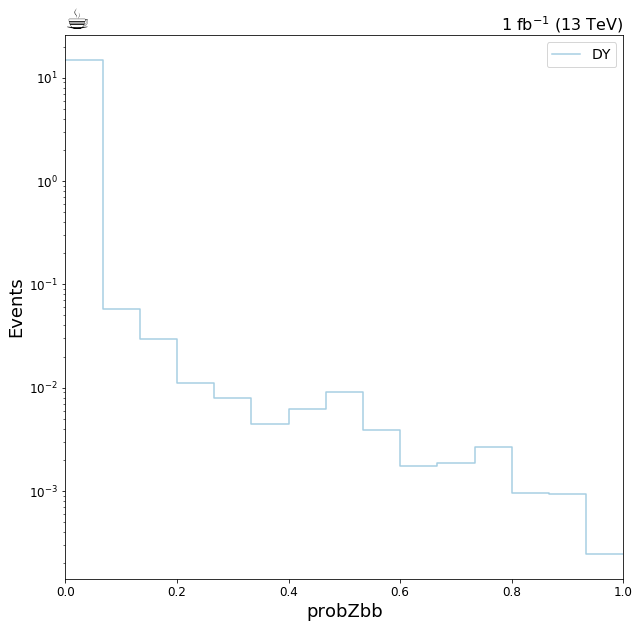

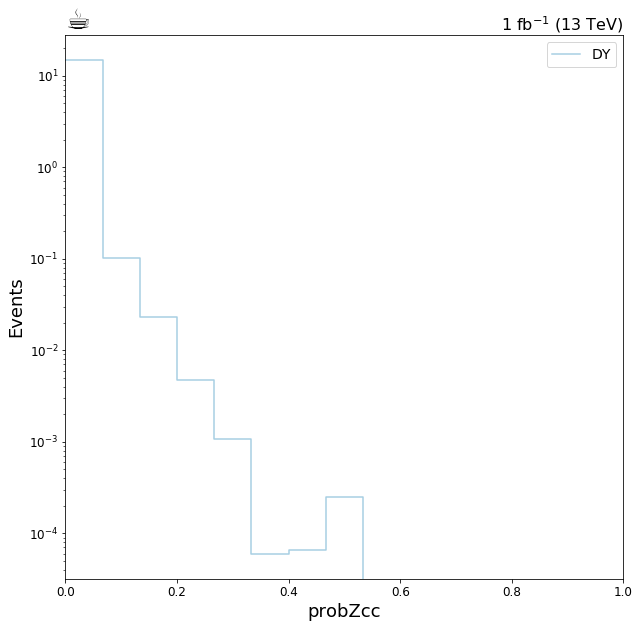

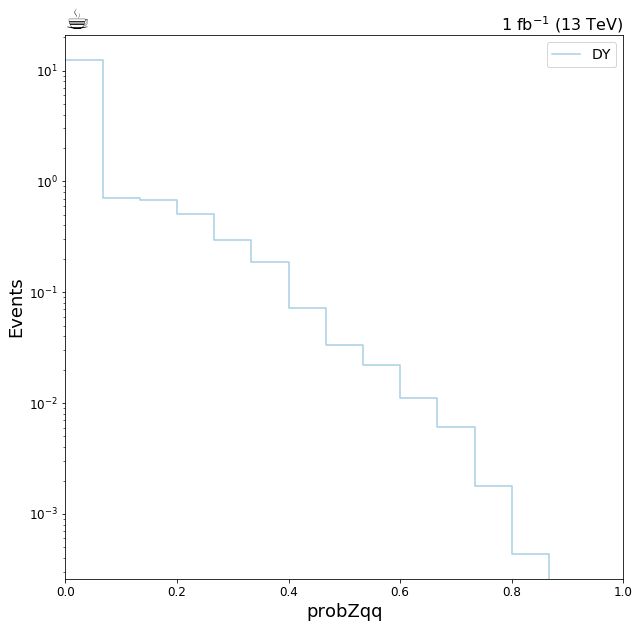

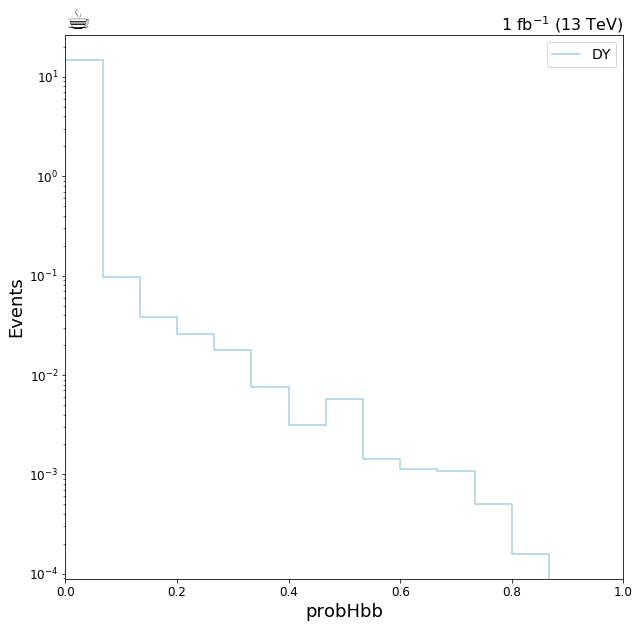

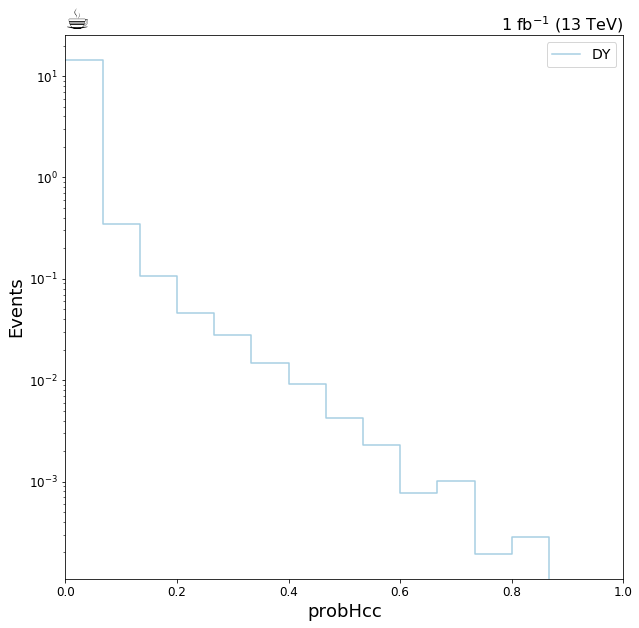

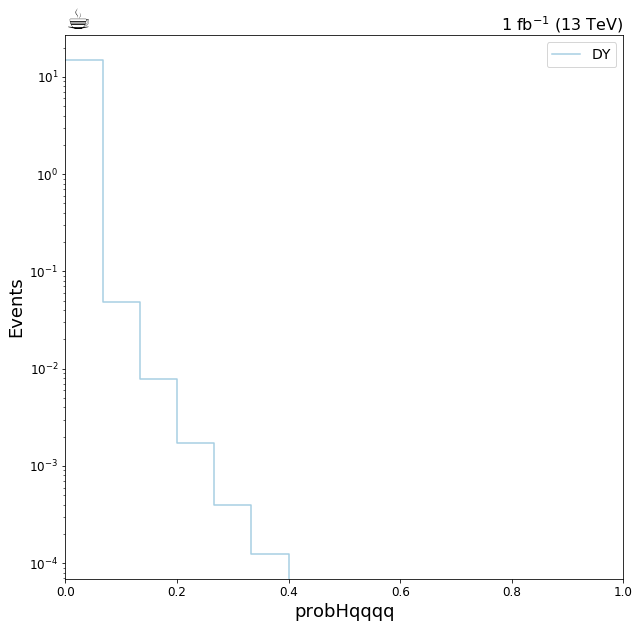

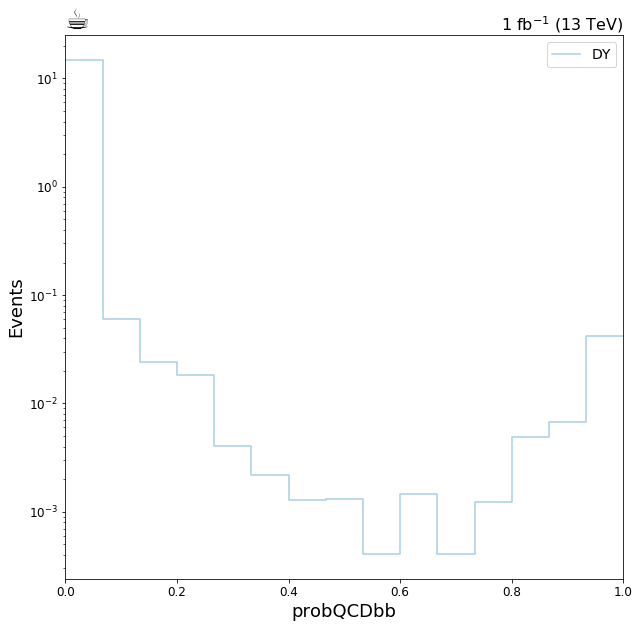

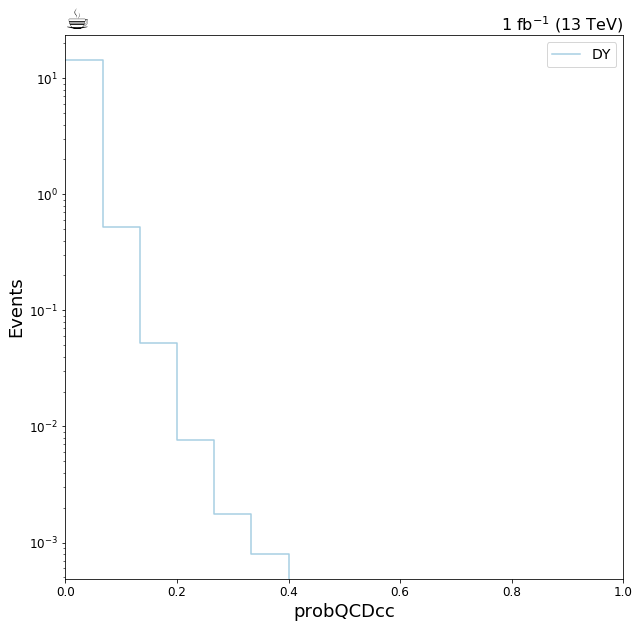

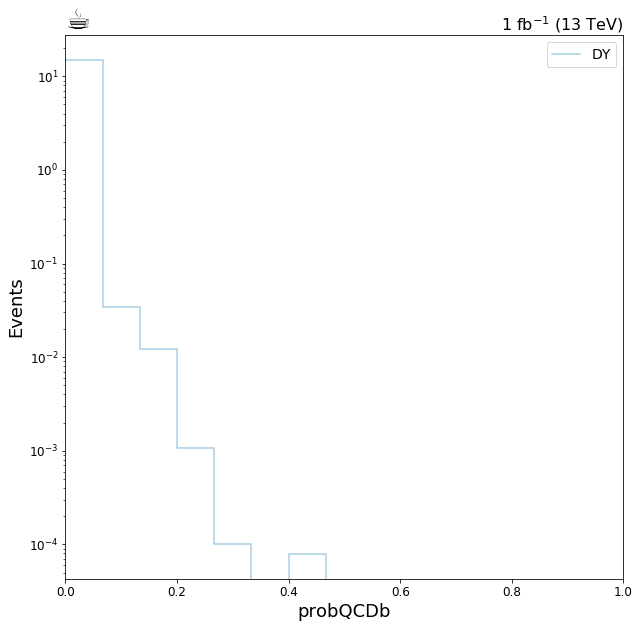

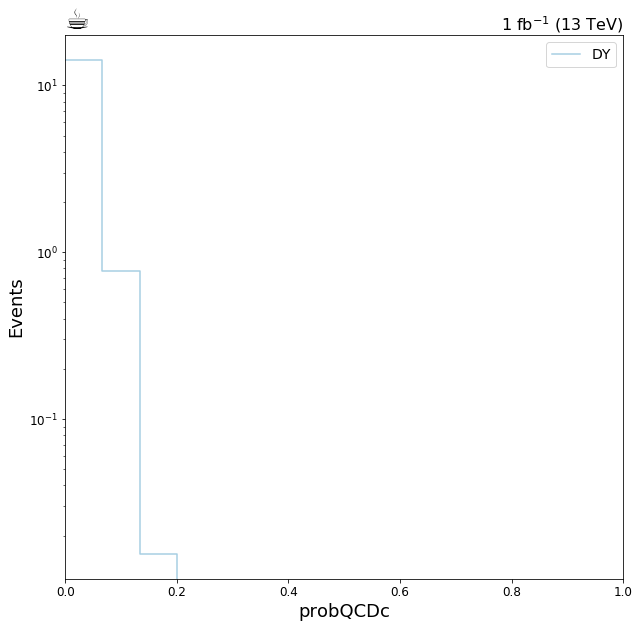

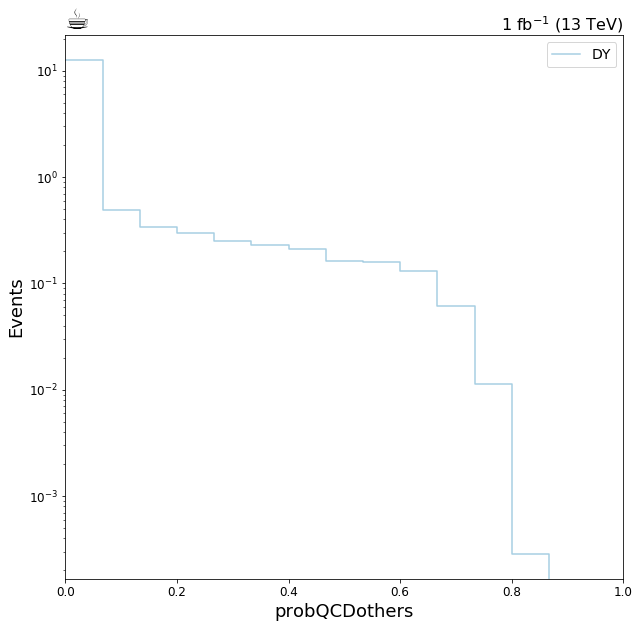

In [15]:
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

if not os.path.exists('unstack'):
    os.makedirs('unstack')


for key in hists.keys():
    if key=='sumw': continue
    
    jet_selection='baggy'
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection',jet_selection).project('region','istwoM'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    #ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'_'+jet_selection+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

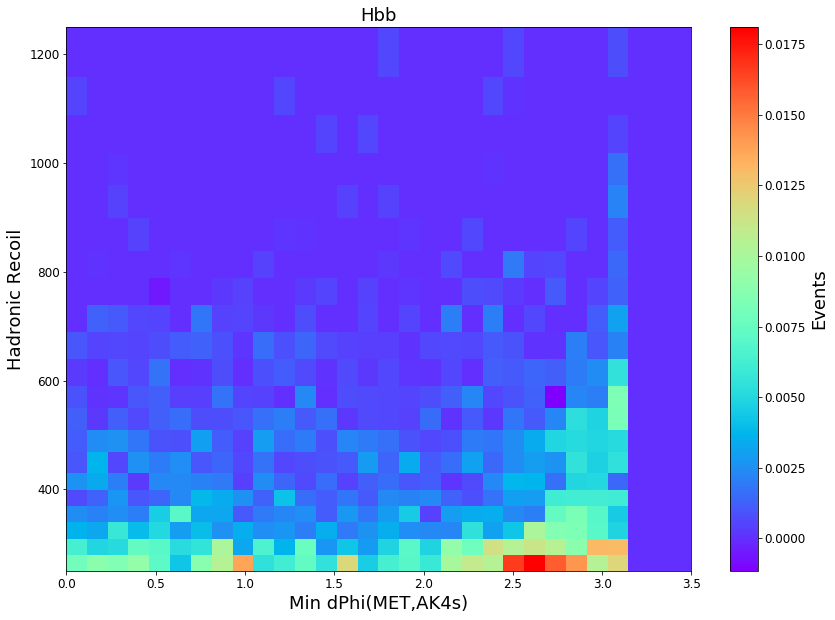

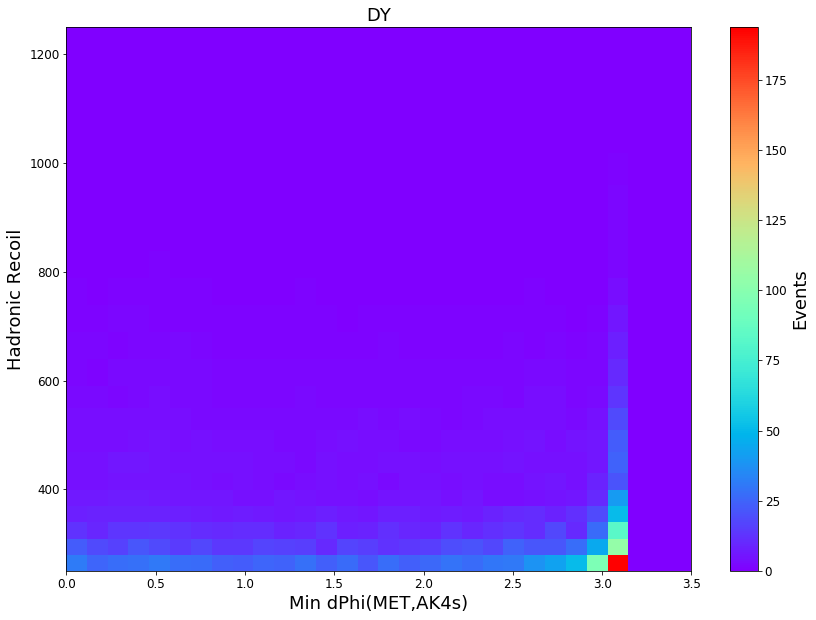

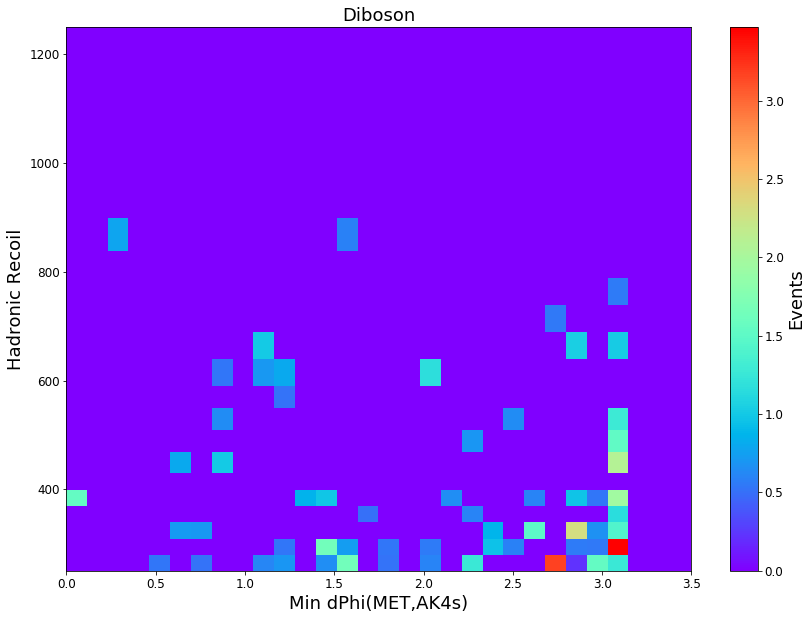

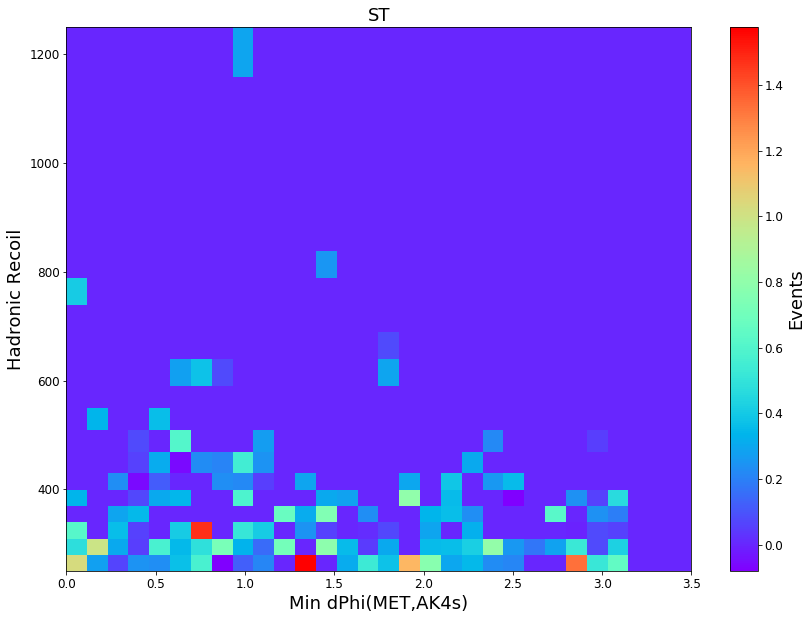

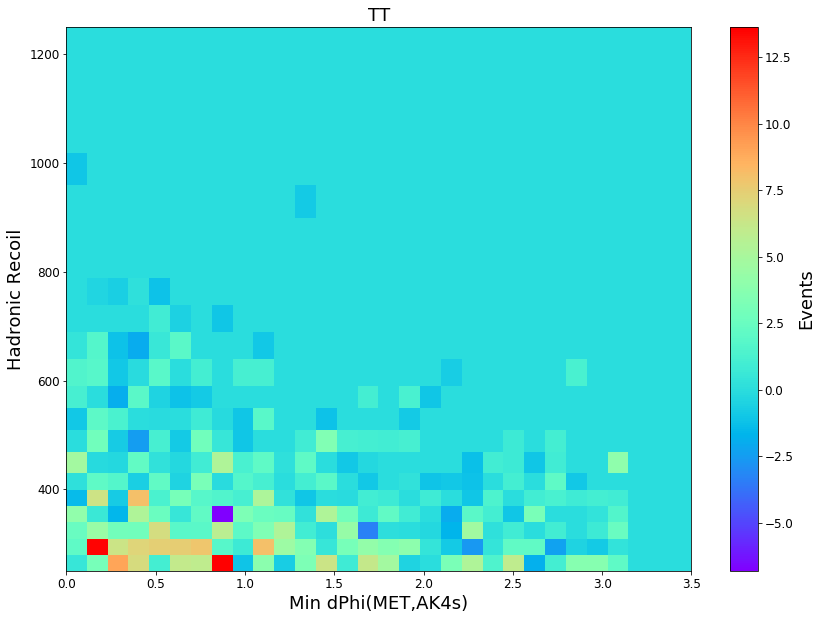

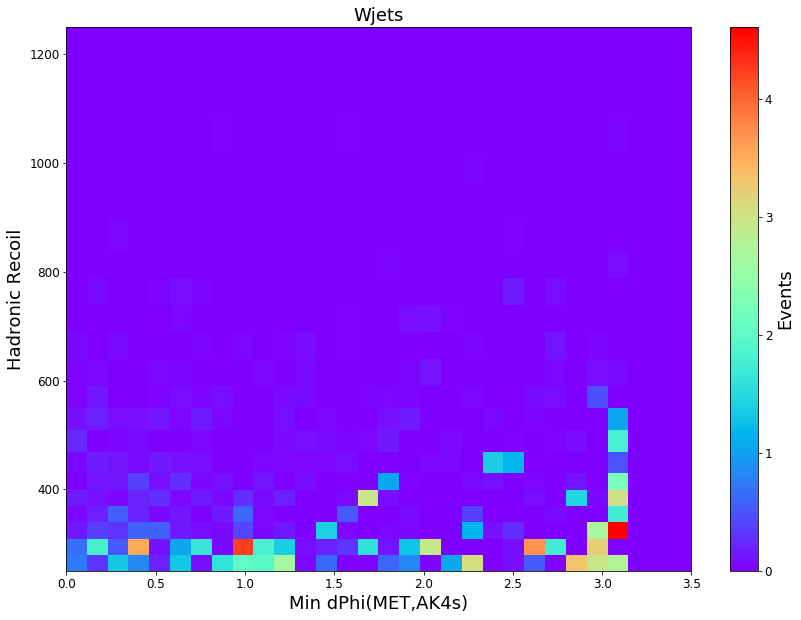

In [13]:
plt.rcParams["figure.figsize"] = (14, 10)
plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

if not os.path.exists('plots2d'):
    os.makedirs('plots2d')

j_sel = 'baggy'
region = 'istwoE'

h2d = hists['recoilVSmindphi'].project('jet_selection', j_sel).project('region', region)
for p in h2d.identifiers('process'):
    fig, ax, _ = plot.plot2d(h2d.project('process',p), xaxis='mindphi', patch_opts={'cmap':'rainbow'})
    plot_path = os.path.abspath('plots2d')
    plot_name = str(j_sel)+'_'+str(region)+'_'+str(p)+'.png'
    ax.set_title(str(p))
    fig.savefig(os.path.join(plot_path, plot_name))

In [10]:
hists['recoilVSmindphi'].project('jet_selection','baggy').project('region','isoneM').identifiers('process','DY')

[<StringBin (Hbb) instance at 0x7f0dc4aa75c0>,
 <StringBin (DY) instance at 0x7f0dc48c07f0>,
 <StringBin (Diboson) instance at 0x7f0dc48c01d0>,
 <StringBin (ST) instance at 0x7f0dc48c0ef0>,
 <StringBin (TT) instance at 0x7f0dc48c0b00>,
 <StringBin (Wjets) instance at 0x7f0dc48c0978>]

In [11]:
hists['recoilVSmindphi'].project('jet_selection','baggy').project('region','isoneM').project('process','DY')

<Hist (recoil,mindphi) instance at 0x7f0dc4d19400>

In [9]:
hists['recoil'].project('jet_selection')

<Hist (process,region,recoil) instance at 0x7f91172c2ef0>